# Hyperskill python dataset analysis

## Settings

In [1]:
import pandas as pd
import numpy as np

from typing import List, Dict
import string
import sys

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', font_scale=2, rc={"lines.linewidth": 5, "lines.markersize": 15})

In [2]:
import importlib
import attrs
import statistics
import plots

importlib.reload(attrs)
importlib.reload(statistics)
importlib.reload(plots)

from attrs import draw_base_attrs

from statistics import get_submissions_percent_by_issues, get_client_stats, \
    get_submissions_series_dynamic_by_feature, get_submissions_series_issues_dynamic, \
    get_top_issues, get_submissions_percent_by_feature, \
    get_submissions_series_client_dynamic

from plots import draw_compare, draw_heatmap_compare, \
    draw_hist_plots, draw_count_plots, \
    draw_stat_plot, draw_client_dynamic_graph

difficulty
easy -> medium -> hard


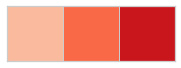

complexity
shallow -> middle -> deep


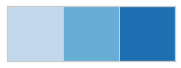

level
low -> average -> high


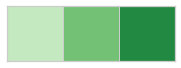

client
idea -> web


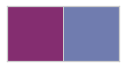

In [3]:
draw_base_attrs()

In [4]:
def merge_dfs(df_left: pd.DataFrame, df_right: pd.DataFrame, left_on: str, right_on: str) -> pd.DataFrame:
    df_merged = pd.merge(df_left, df_right, left_on=left_on, right_on=right_on, suffixes=('', '_extra'))
    df_merged.drop(df_merged.filter(regex='_extra$').columns.tolist(), axis=1, inplace=True)
    return df_merged

### Set path to following csv files (or use preset default)

In [5]:
users_file_path = '../../data/output/python/users.csv'
steps_file_path = '../../data/output/python/steps.csv'
topics_file_path = '../../data/output/python/topics.csv'

submissions_file_path = '../../data/output/python/solutions_python3.csv'
submissions_stats_file_path = '../../data/output/python/submissions_metrics.csv'
client_stats_file_path = '../../data/output/python/submissions_client_stats.csv'

raw_issues_stats_file_path = '../../data/output/python/raw_issues_stats.csv'
# qodana_issues_stats_file_path = '../../data/output/python/qodana_issues_stats.csv'
raw_issues_classes_file_path = '../../data/output/python/raw_issues.csv'
# qodana_issues_classes_file_path = '../../data/output/python/qodana_issues.csv'

## Steps and Topics
**Step** - is a task where user is asked to write some code. Main attributes:
* `id` - *identifier of step*
* `seconds_to_complete` - *estimated secons to complete (calculated as average from all successful sumbissions)*
* `solved_by` - *number of successful sumbissions*
* `success_rate` - *number of successful sumbissions dvided by total number of sumbissions*
* `topic_id` - *id of topic step is related to*
* `complexity` - [`shallow`, `middle`, `deep`] *according to topic depth [d<=3, 3<d<6, d>=6]*
* `difficulty` - [`easy`, `medium`, `hard`] *according to success_rate [sr<=0.33, 0.33<sr<0.66, sr>=0.66]*

**Topic** - is a theme or knowledge area. Every step is related to some topic. Main attributes:
* `id` - *identifier of step*
* `prerequisites` - *topics ids which must be leared before*
* `depth` - *the depth in topics tree*

In [6]:
df_steps = pd.read_csv(steps_file_path)
df_steps.describe().astype('int32')

id  topic_id  seconds_to_complete  solved_by  success_rate  comment  \
count    364       364                  364        364           364      364   
mean    9051       706                  240       7739             0       20   
std     2709       352                  197      11695             0       27   
min     5205       333                   51         12             0        0   
25%     6718       414                  108        561             0        2   
50%     8440       510                  181       3676             0       11   
75%    10791       956                  302       9481             0       31   
max    15188      1585                 1805      82724             0      205   

       hint  useful link  solutions  neutral  love  angry  happy  sad  depth  \
count   364          364        364      364   364    364    364  364    364   
mean     14            1        337        7   510     21     79   10      3   
std      14            1        306       13   744     38    153   19      2   
min       0            0          3        0     2      0      0    0      0   
25%       4            0         62        1    35      1      5    0      2   
50%      12            0        284        2   285      7     32    3      3   
75%      21            2        522        9   619     23     81   11      5   
max     123           14       2010      124  5536    286   1517  164     10   

       prerequisites_count  
count                  364  
mean                    18  
std                     19  
min                      0  
25%                      5  
50%                     11  
75%                     26  
max                     78

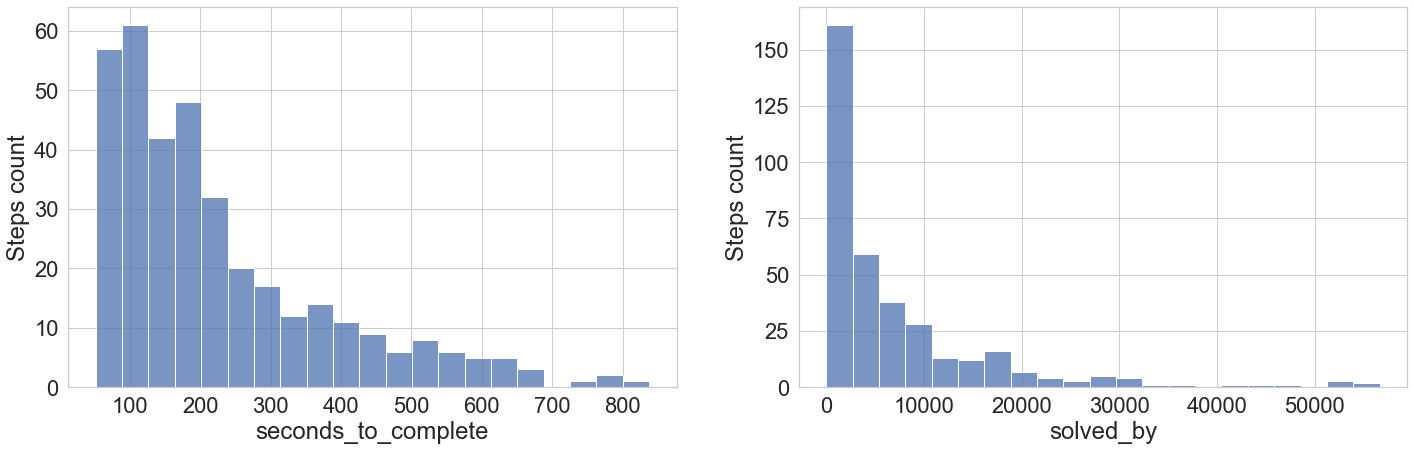

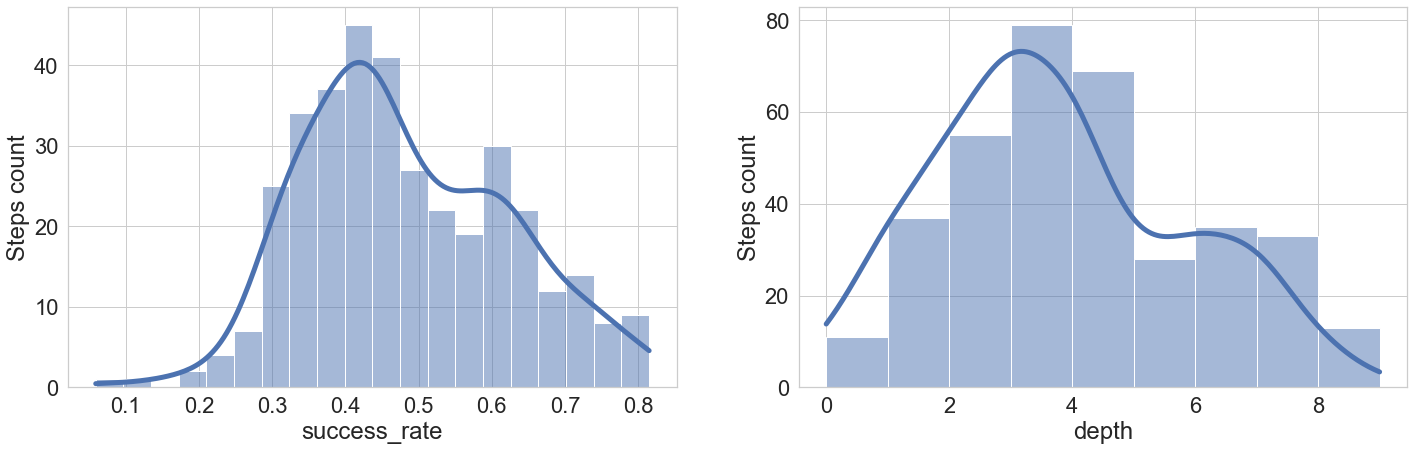

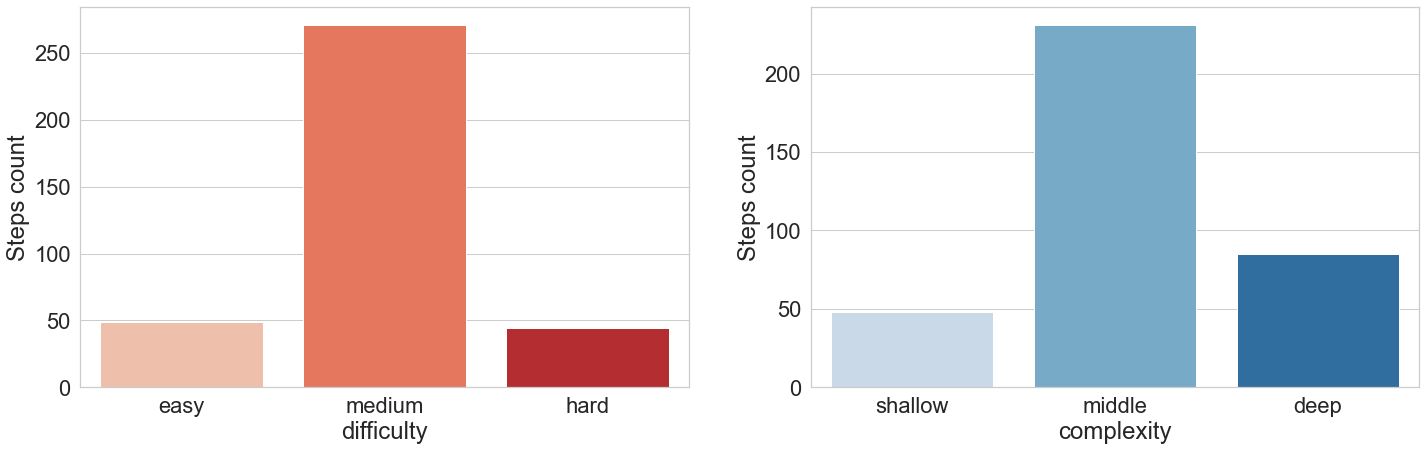

In [7]:
draw_hist_plots(df_steps, ['seconds_to_complete', 'solved_by'], log_scale=False, y_label='Steps count')
draw_hist_plots(df_steps, ['success_rate', 'depth'], log_scale=False, kde=True, y_label='Steps count')
draw_count_plots(df_steps, ['difficulty',  'complexity'], y_label='Steps count')

## Users

* `id` - *identifier of user*
* `passed_theories` - *number of passed theories steps*
* `passed_problems` - *number of passed problems*
* `passed_topics` - *number of passed topics*
* `passed_stages` - *number of passed stages*
* `passed_projects` - *number of passed projects*
* `hypercoins` - *number of collected hypercoins*
* `active_days` - *number of active days*
* `max_streak` - *max streak*
* `level` - `[low, avg, high]` *according to passed_topics [tp<=20, 20<tp<40, tp>=40]*

In [8]:
df_users = pd.read_csv(users_file_path)
df_users.describe().astype('int32')

id  passed_theories  passed_problems  passed_topics  passed_stages  \
count   3145             3145             3145           3145           3145   
mean   16583              124              675            124             25   
std    11958              139              899            139             41   
min        3                1                1              0              0   
25%     6417               30              120             28              3   
50%    14515               76              358             76             11   
75%    26456              168              861            169             29   
max    82097             1143             8834           1155            525   

       passed_projects  hypercoins  active_days  max_streak  
count             3145        3145         3145        3145  
mean                 3         821           47          13  
std                  7        1451           71          33  
min                  0           0            0           0  
25%                  0         189            7           3  
50%                  1         363           22           6  
75%                  4         808           56          11  
max                109       28201          680         715

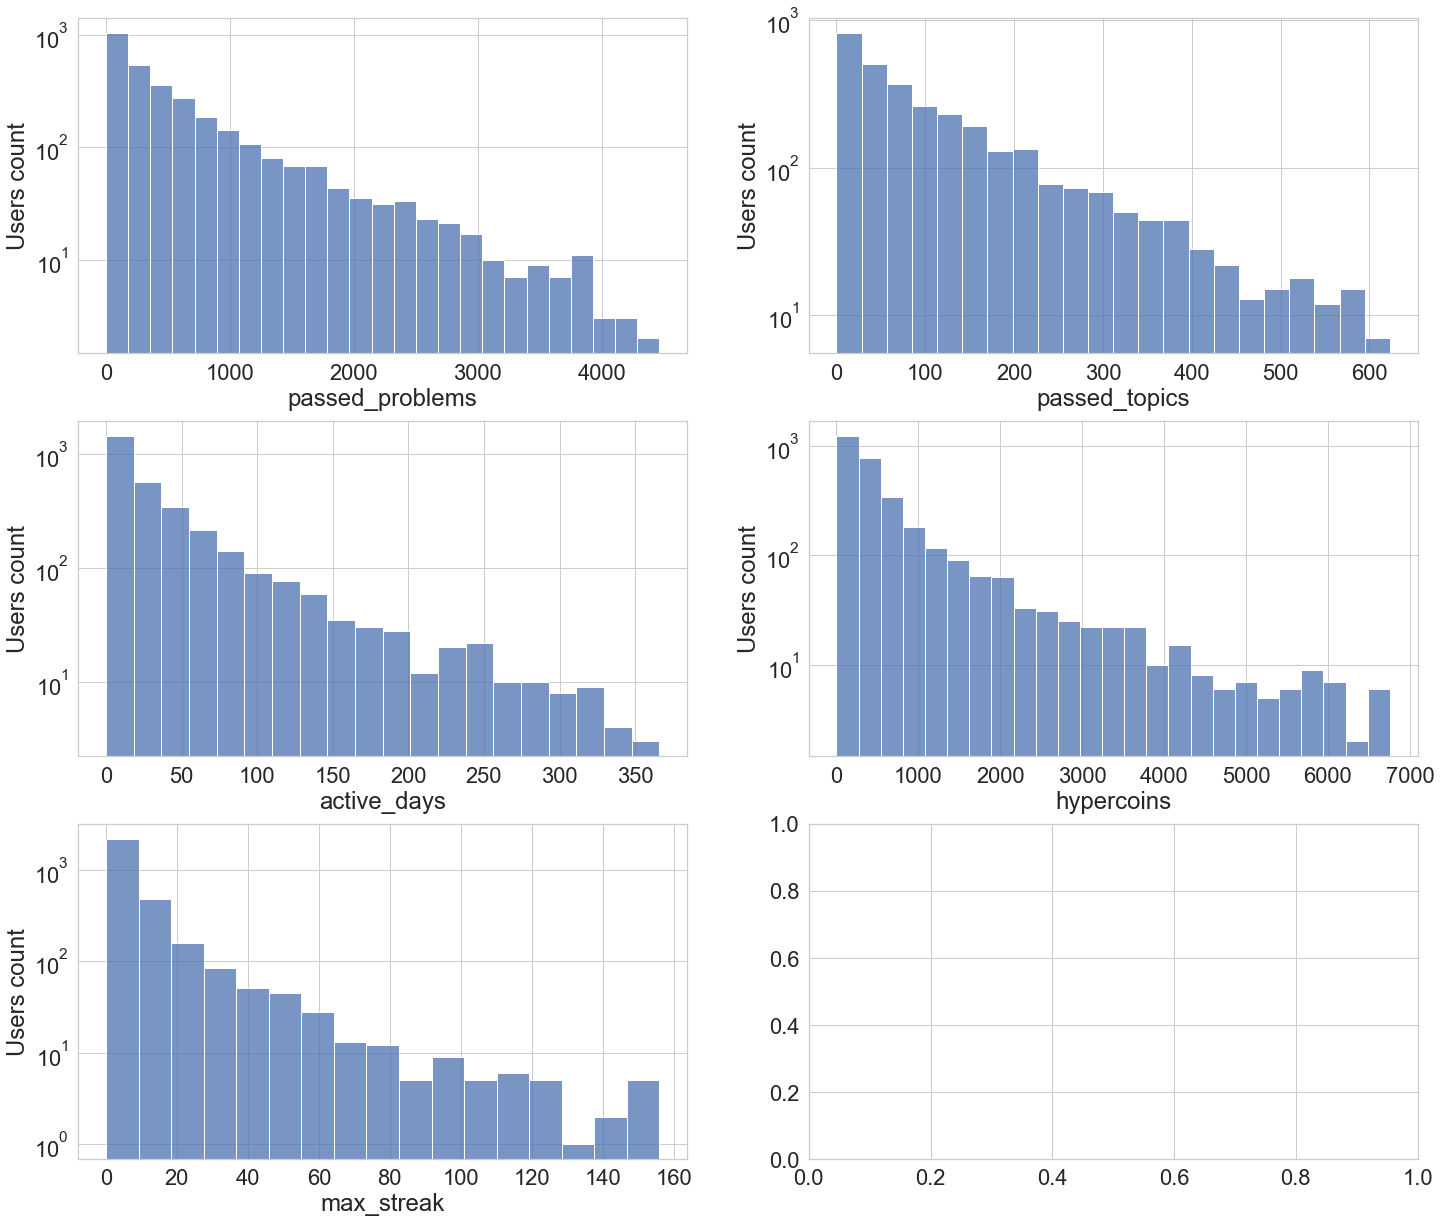

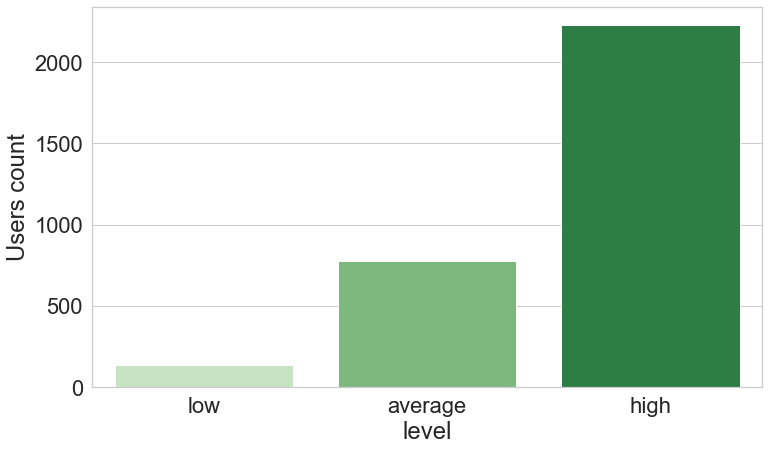

In [9]:
draw_hist_plots(df_users, ['passed_problems', 'passed_topics', 
                           'active_days', 'hypercoins', 
                           'max_streak'], log_scale=(False, True), y_label='Users count')
draw_count_plots(df_users, ['level'], y_label='Users count')

## Submissions
Total number of submissions: 1459860\
Number of filtered submissions: 1411218 (without automatic resubmissions and suspicious submissions [too different from previous])

* `id` - *identifier of submission*
* `step_id` - *identifier of step*
* `user_id` - *identifier of user*
* `group` - *number of submission series (group of submissions on one step by one user)*
* `attempt` - *number of attempt inside submission series*
* `total_attempt` - *number of attempts is submission series*
* `base_client` - `[web, idea, ide, IdeaEdu, Idea]` *interface from which submission was submitted*
* `client` - `[web, idea]` *interface group from which submission was submitted*

In [12]:
df_submissions = pd.read_csv(submissions_file_path)
df_submissions.describe()

id        step_id   sync_counter  code_style        user_id  \
count  1.388770e+05  138877.000000  138877.000000         0.0  138877.000000   
mean   4.268375e+07    7364.397013       4.835480         NaN   14626.531161   
std    7.723762e+06    1644.008520       1.038506         NaN   11859.941681   
min    2.938330e+07    5205.000000       2.000000         NaN       3.000000   
25%    3.572875e+07    6404.000000       4.000000         NaN    4223.000000   
50%    4.270658e+07    6814.000000       5.000000         NaN   12241.000000   
75%    4.952966e+07    8213.000000       5.000000         NaN   21792.000000   
max    5.639711e+07   15188.000000      19.000000         NaN   82097.000000   

              group        attempt  total_attempts  
count  1.388770e+05  138877.000000   138877.000000  
mean   1.056553e+05       1.177027        1.354054  
std    8.004168e+04       0.507673        0.751551  
min    2.000000e+00       1.000000        1.000000  
25%    5.276900e+04       1.000000        1.000000  
50%    1.045290e+05       1.000000        1.000000  
75%    1.538420e+05       1.000000        1.000000  
max    1.722213e+06       5.000000        5.000000

### Sumbission client distriburion


<AxesSubplot:xlabel='client', ylabel='Count'>

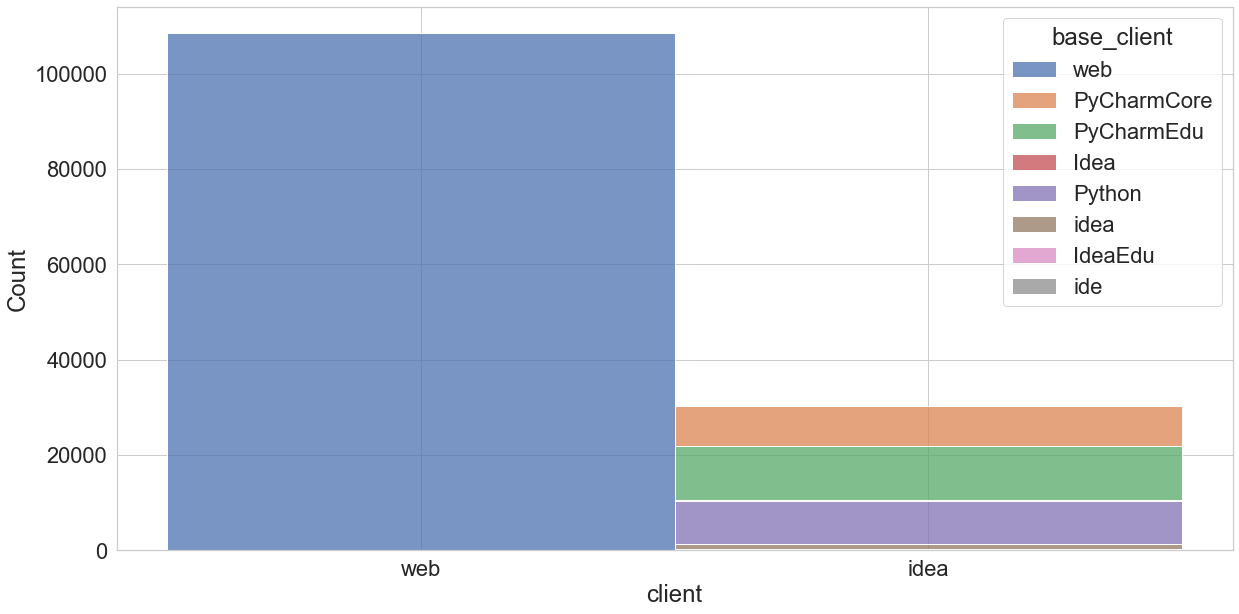

In [13]:
fig, ax = plt.subplots(figsize=((20, 10)))
sns.histplot(data=df_submissions, x='client', hue='base_client', multiple='stack')

## Submission statistics
* `code_lines_count` - number of code lines
* `code_symbols_count` - number of code symbols
* `raw_issues_count` - number of raw issues
* `qodana_issues_count` - number of qodana issues
* `raw_issues_by_code_lines` - number of raw issues divided by code lines
* `qodana_issues_by_code_lines` - number of qodana issues divided by code lines

In [14]:
df_submissions_stats = pd.read_csv(submissions_stats_file_path)
df_submissions_stats.to_csv(submissions_stats_file_path, index=False)
df_submissions_stats.describe()

id  code_lines_count  code_symbols_count  raw_issues_count  \
count  1.388770e+05     138877.000000       138877.000000     138877.000000   
mean   4.268375e+07          6.762653          132.572687          2.491586   
std    7.723762e+06          4.705792          126.514419          2.978935   
min    2.938330e+07          1.000000            8.000000          0.000000   
25%    3.572875e+07          4.000000           51.000000          1.000000   
50%    4.270658e+07          6.000000           96.000000          1.000000   
75%    4.952966e+07          9.000000          173.000000          3.000000   
max    5.639711e+07         89.000000         3264.000000        105.000000   

       raw_issues_by_code_lines  
count             138877.000000  
mean                   0.418154  
std                    0.413673  
min                    0.000000  
25%                    0.181818  
50%                    0.333333  
75%                    0.500000  
max                   11.000000

In [15]:
df_submissions_stats = merge_dfs(df_submissions_stats, df_submissions, left_on='id', right_on='id')
df_submissions_stats = merge_dfs(df_submissions_stats, df_steps[['id', 'complexity', 'difficulty']], left_on='step_id', right_on='id')
df_submissions_stats = merge_dfs(df_submissions_stats, df_users[['id', 'level']], left_on='user_id', right_on='id')

In [16]:
df_submissions_stats['raw_issues_by_code_lines'] = df_submissions_stats['raw_issues_count'] / df_submissions_stats['code_lines_count']
df_submissions_stats['qodana_issues_by_code_lines'] = df_submissions_stats['qodana_issues_count'] / df_submissions_stats['code_lines_count']

KeyError: 'qodana_issues_count'

In [ ]:
df_submissions_stats['raw_issues_count'].unique()

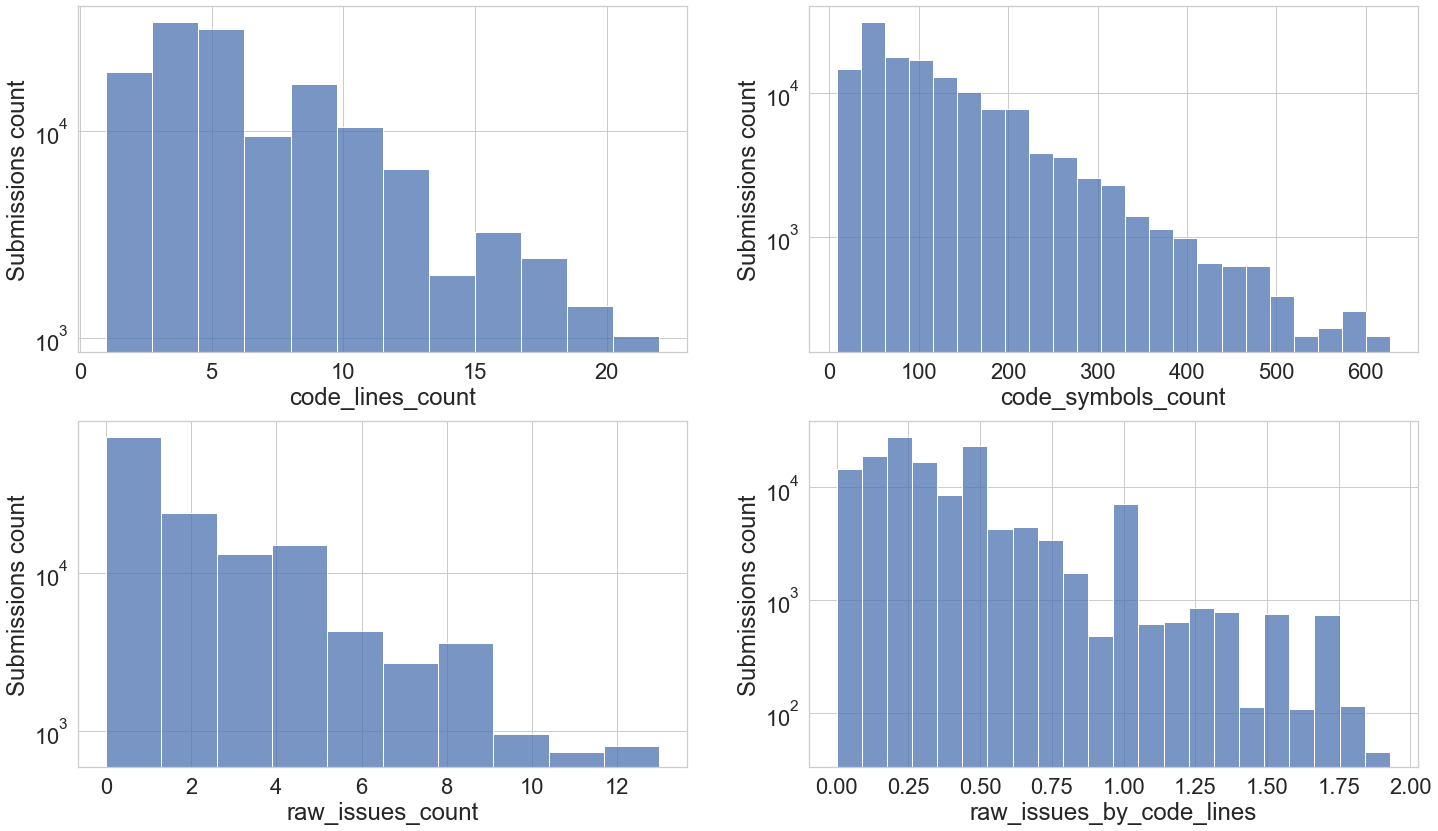

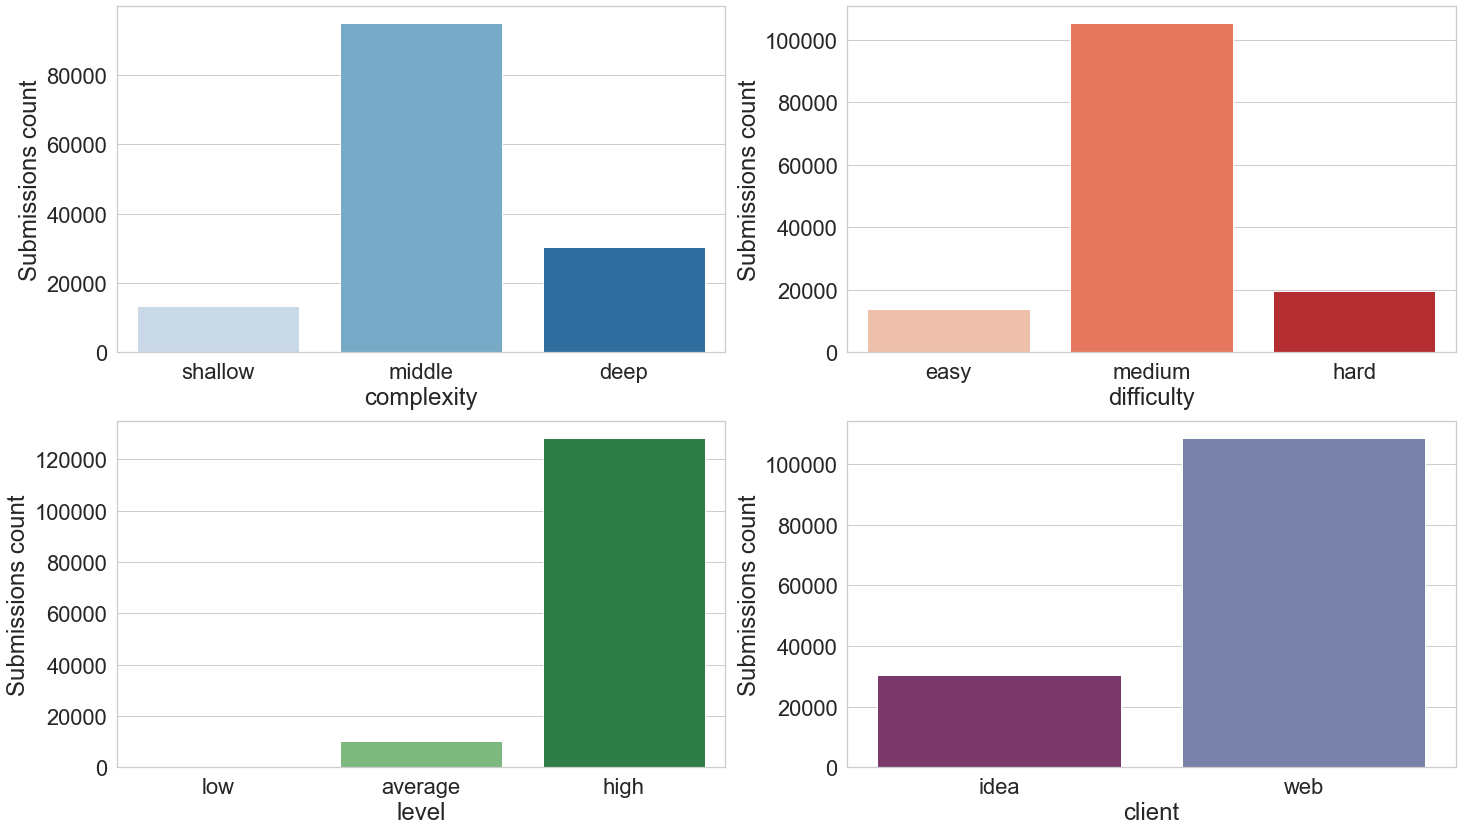

In [17]:
draw_hist_plots(df_submissions_stats, ['code_lines_count', 'code_symbols_count', 
                                       'raw_issues_count', 'raw_issues_by_code_lines'], 
                log_scale=(False, True), y_label='Submissions count')

draw_count_plots(df_submissions_stats, ['complexity', 'difficulty', 'level', 'client'], y_label='Submissions count')

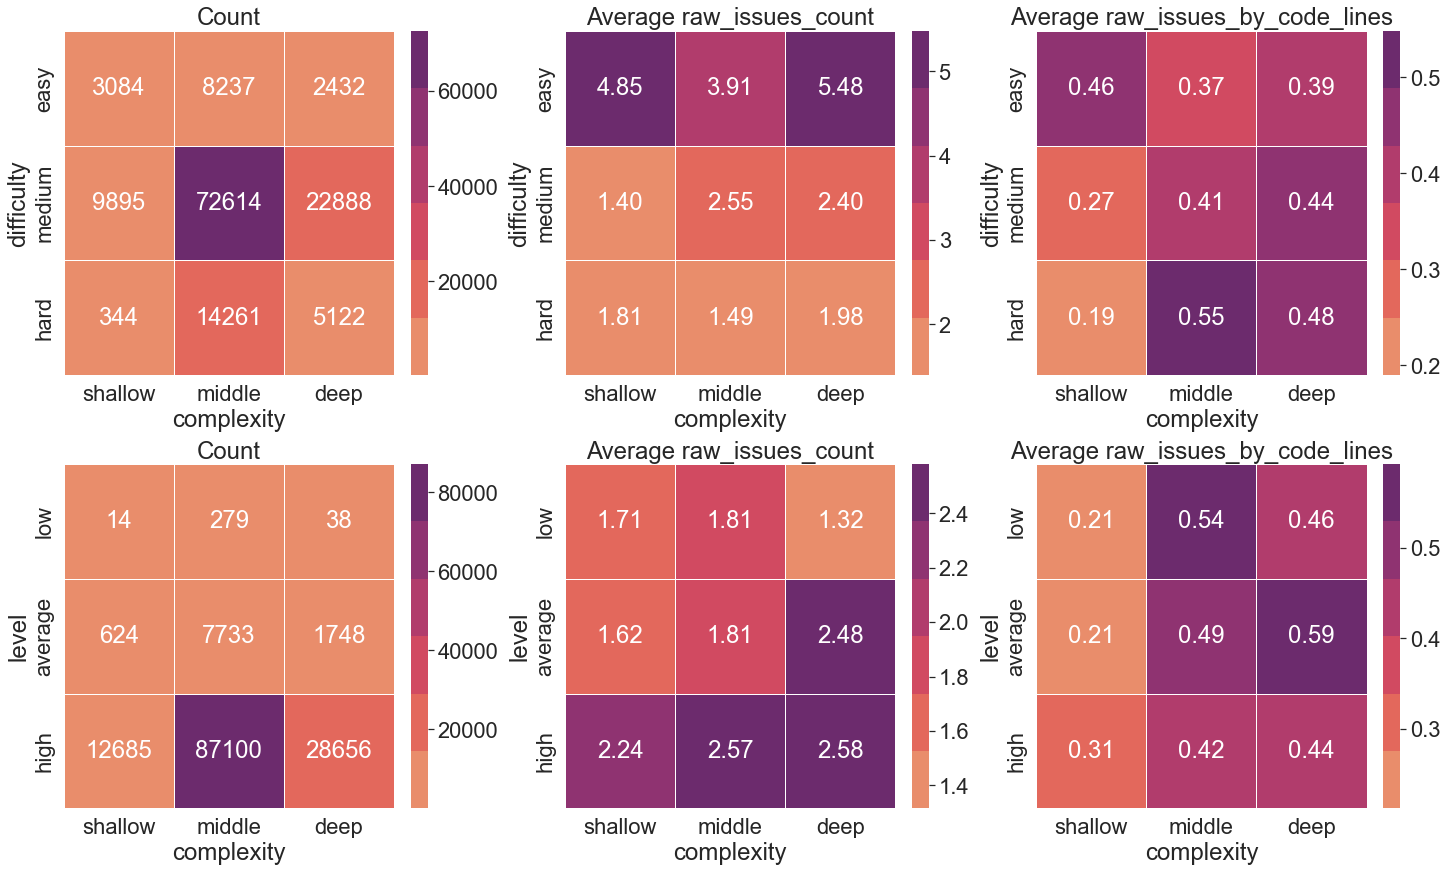

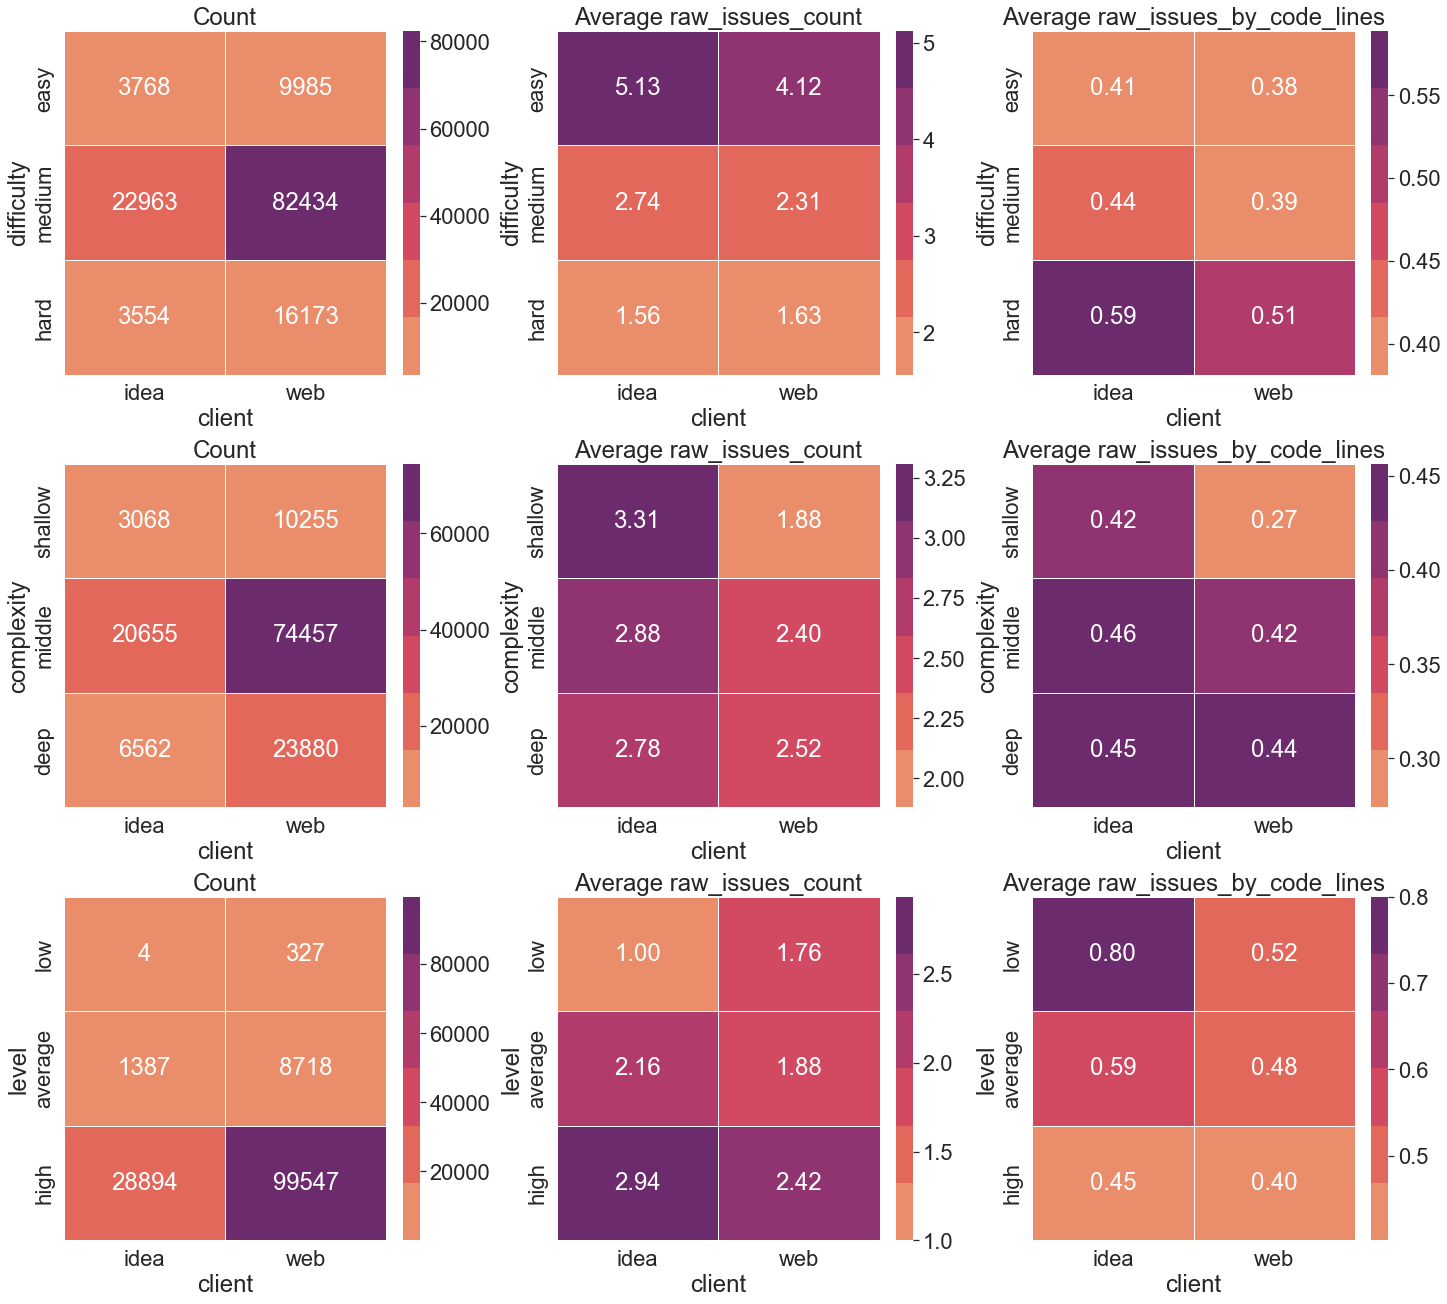

In [18]:
draw_heatmap_compare(df_submissions_stats, 
                     [('difficulty', 'complexity'), ('level', 'complexity')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])
draw_heatmap_compare(df_submissions_stats,
                     [('difficulty', 'client'), ('complexity', 'client'), ('level', 'client')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])

### Submissions percent distribution according to feature values

In [19]:
def draw_feature(feature: str, feature_range: List[float]):
    for attr in ['difficulty', 'complexity', 'level', 'client']:
        df_feature_stats = get_submissions_percent_by_feature(df_submissions_stats, feature, attr, feature_range)
#         uncomment to save stats to csv
#         df_feature_stats.to_csv(f'feature_stats_{attr}.csv', index=False)
        draw_compare(df_feature_stats, feature, attr)

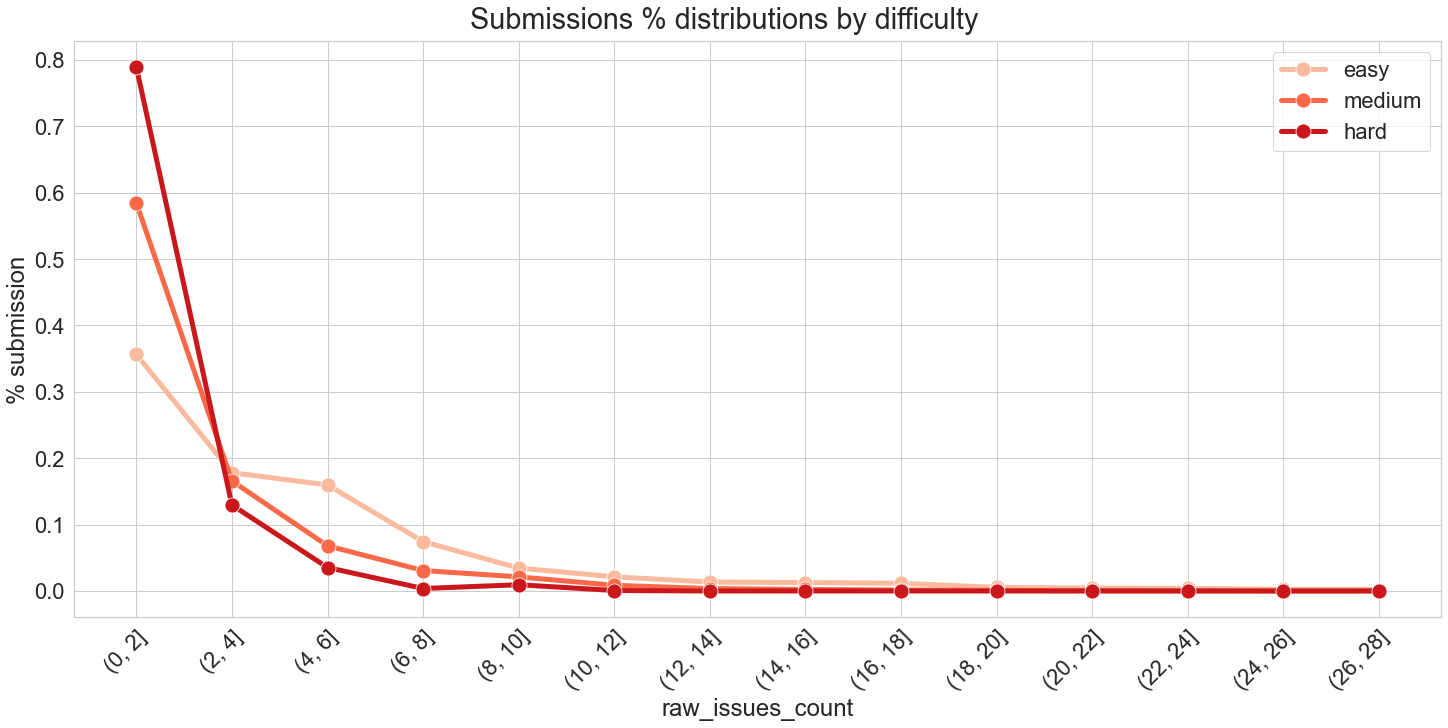

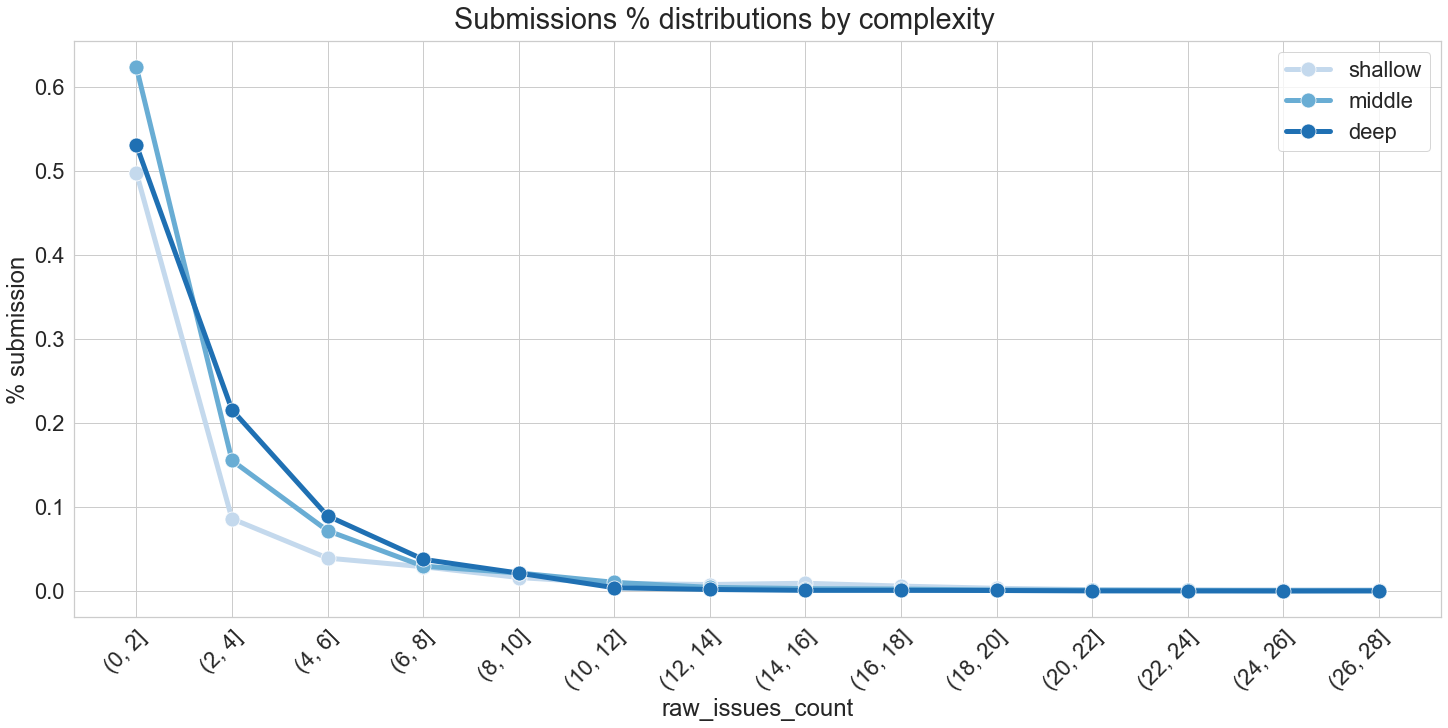

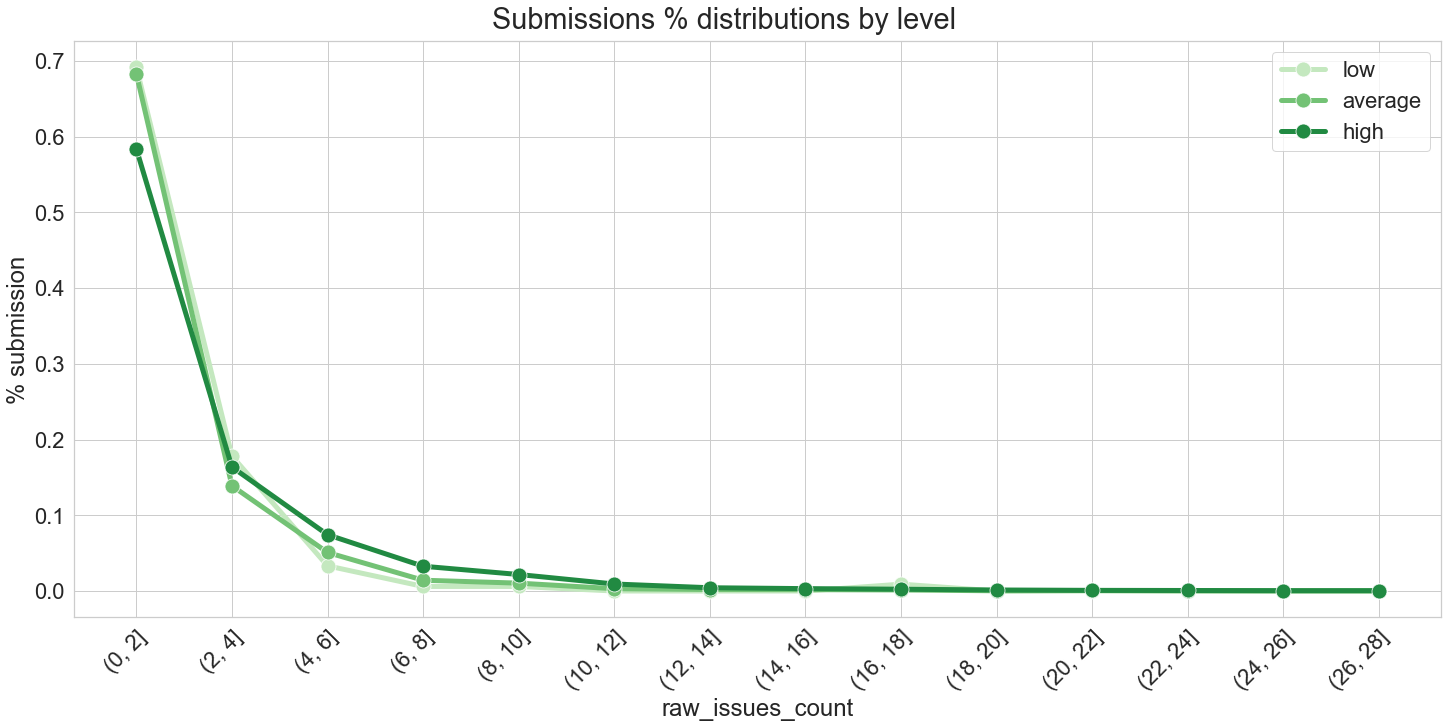

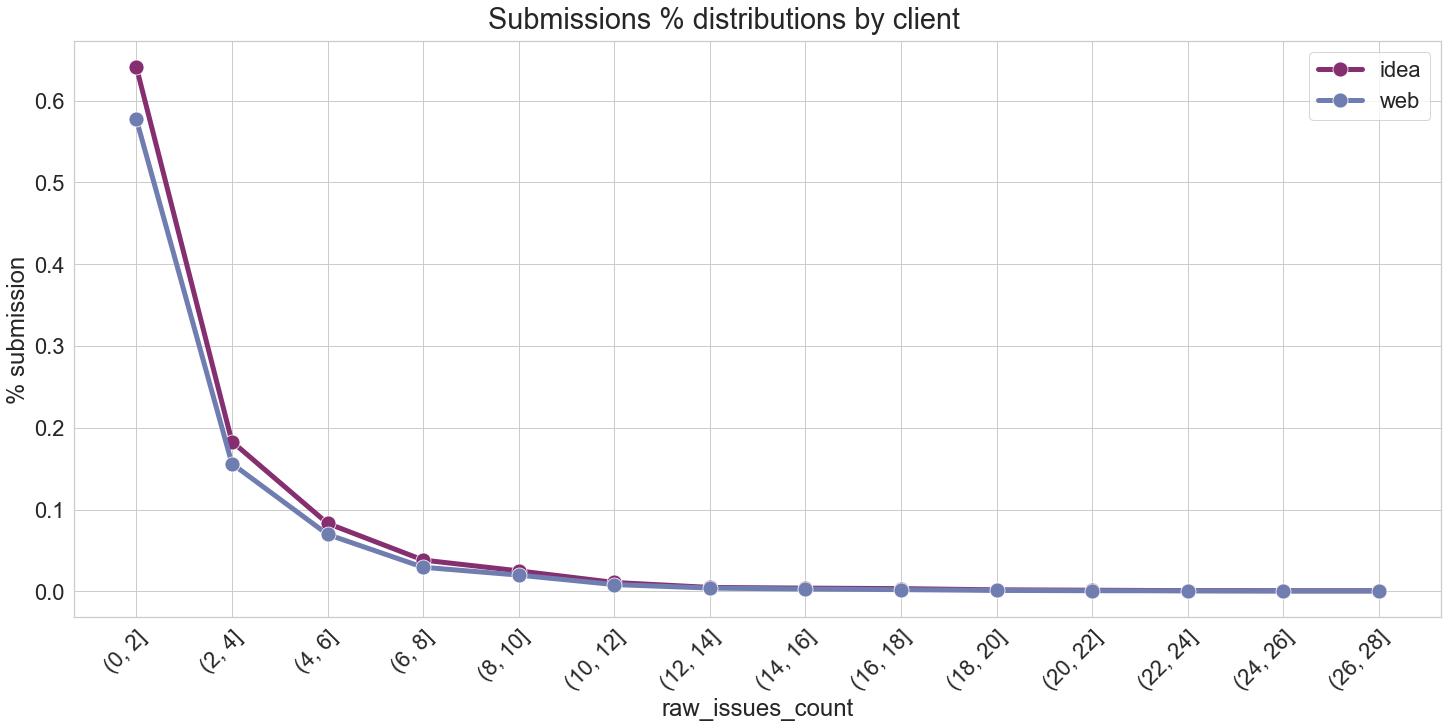

In [20]:
draw_feature('raw_issues_count', range(0, 30, 2))

# Issues

Issue is code quality error which has `class` e.x. MagicNumberCheck and `type` e.x. INFO.
Each submission has number of `raw_issues` detected by Hyperstyle and `qodana_issues` detected by Qodana. 

In [21]:
def draw_issues(df: pd.DataFrame, df_issues: pd.DataFrame, blur_issues):
    for attr in ['difficulty', 'complexity', 'level', 'client']:
        df_stats = get_submissions_percent_by_issues(df, df_issues, attr)
#         uncomment to save stats to csv
#         df_stats.to_csv(f'issues_stats_{attr}.csv', index=False)
        draw_compare(df_stats, 'issue', attr, blur_issues)

## Raw issue

In [22]:
df_raw_issues_stats = pd.read_csv(raw_issues_stats_file_path)
df_raw_issues_stats = df_raw_issues_stats[df_raw_issues_stats['id'].isin(df_submissions['id'])]
df_raw_issues_stats.describe()

id           H601         RAD100           E265  \
count  1.388770e+05  138877.000000  138877.000000  138877.000000   
mean   4.268375e+07       0.026297       0.900704       0.017512   
std    7.723762e+06       0.192981       0.299061       0.188707   
min    2.938330e+07       0.000000       0.000000       0.000000   
25%    3.572875e+07       0.000000       1.000000       0.000000   
50%    4.270658e+07       0.000000       1.000000       0.000000   
75%    4.952966e+07       0.000000       1.000000       0.000000   
max    5.639711e+07       3.000000       1.000000       7.000000   

              WPS350           E261           E262          E0602  \
count  138877.000000  138877.000000  138877.000000  138877.000000   
mean        0.015114       0.008713       0.002607       0.002117   
std         0.128615       0.100528       0.057992       0.047351   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       3.000000       5.000000       3.000000   

                E225           F821  ...     E1126     W0150      B012  \
count  138877.000000  138877.000000  ...  138877.0  138877.0  138877.0   
mean        0.034865       0.001793  ...       0.0       0.0       0.0   
std         0.317881       0.043148  ...       0.0       0.0       0.0   
min         0.000000       0.000000  ...       0.0       0.0       0.0   
25%         0.000000       0.000000  ...       0.0       0.0       0.0   
50%         0.000000       0.000000  ...       0.0       0.0       0.0   
75%         0.000000       0.000000  ...       0.0       0.0       0.0   
max        24.000000       3.000000  ...       0.0       0.0       0.0   

         WPS452      C404      B009      E223      B006     W0222     E1128  
count  138877.0  138877.0  138877.0  138877.0  138877.0  138877.0  138877.0  
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[8 rows x 416 columns]

In [23]:
df_raw_issues_stats = merge_dfs(df_raw_issues_stats, df_submissions_stats, left_on='id', right_on='id')

In [24]:
df_raw_issues = pd.read_csv(raw_issues_classes_file_path)
raw_issues_info_classes = [issue['class'] for _, issue in df_raw_issues.iterrows() if issue['type'] == 'INFO']
raw_issues_ignore_classes = []

### Most popular raw issues
In further analysis we will consider only top 15 issues

In [25]:
df_raw_issues_top = get_top_issues(df_raw_issues_stats, df_raw_issues, 15, raw_issues_ignore_classes)
df_raw_issues_top

class                   type   count
1   RAD100        MAINTAINABILITY  125087
15   SC200                   INFO   43883
10    C901  CYCLOMATIC_COMPLEXITY   42947
9   WPS432                   INFO   34306
18    C001          BOOL_EXPR_LEN    8291
29    E226             CODE_STYLE    7540
49    E231             CODE_STYLE    6799
11    C002               FUNC_LEN    6587
7     E225             CODE_STYLE    4842
22  WPS336         BEST_PRACTICES    4081
0     H601               COHESION    3652
2     E265             CODE_STYLE    2432
23  WPS462         BEST_PRACTICES    2361
20  WPS446         BEST_PRACTICES    2144
3   WPS350             CODE_STYLE    2099

In [26]:
# Unique means a flag: 1 if issue presented in submission, 0 otherwise
df_raw_issues_stats_unique = df_raw_issues_stats.copy()
for issue_class in df_raw_issues['class'].values:
    df_raw_issues_stats_unique[issue_class] = df_raw_issues_stats_unique[issue_class].apply(lambda x: min(x, 1))

### Percent of all submissions which contain each raw issue

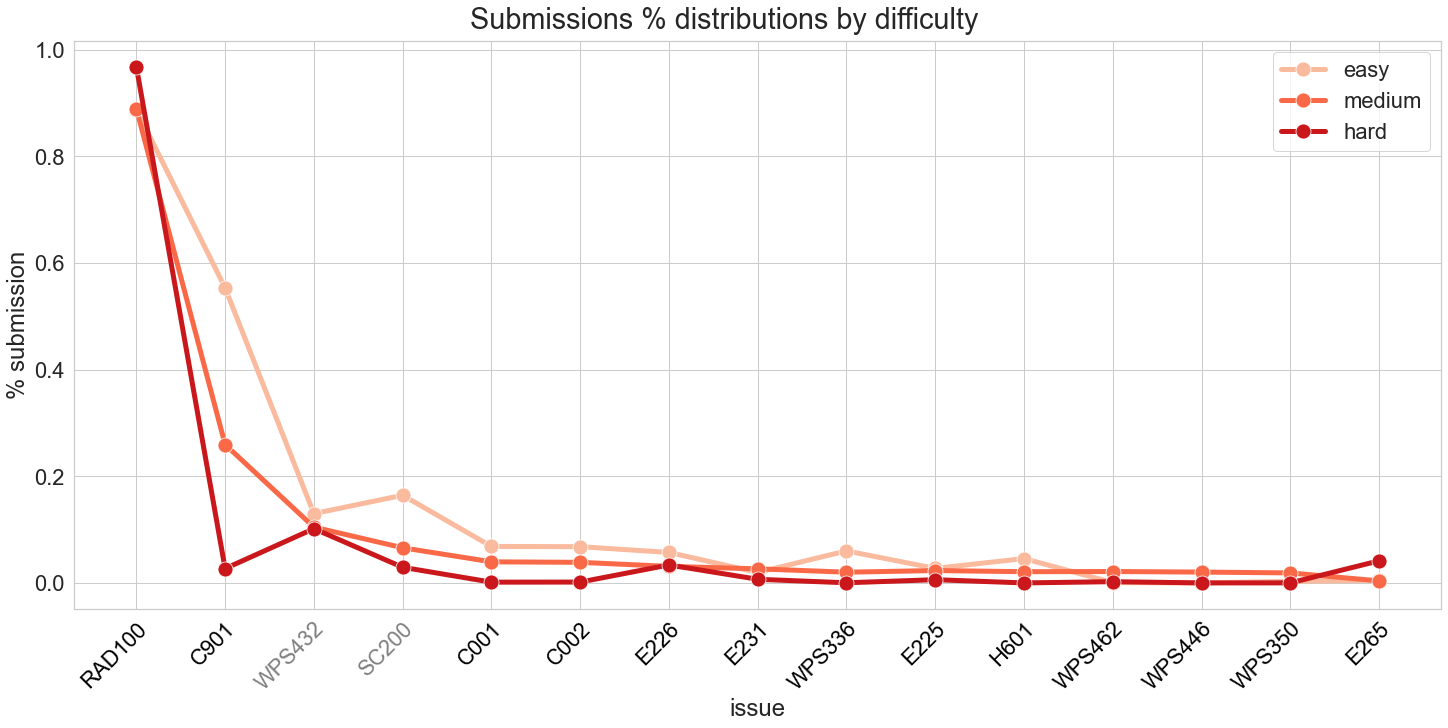

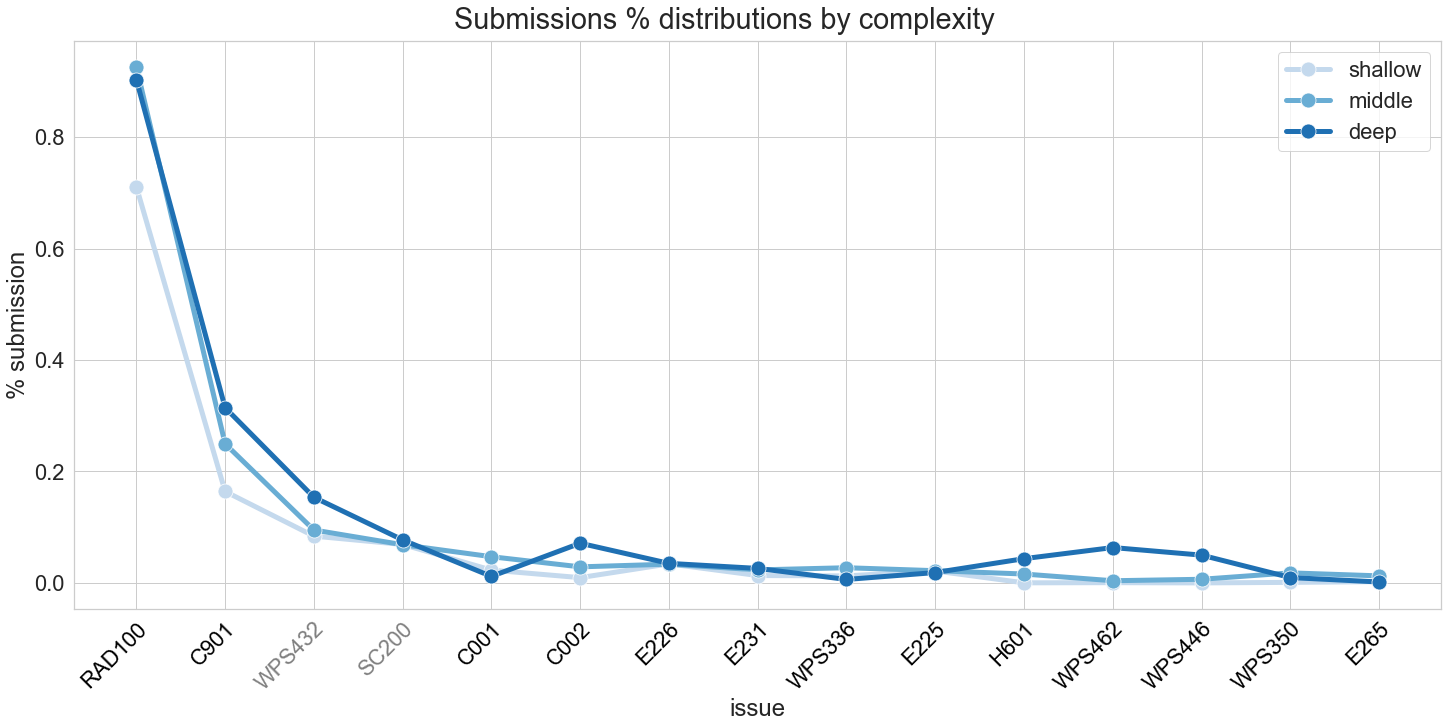

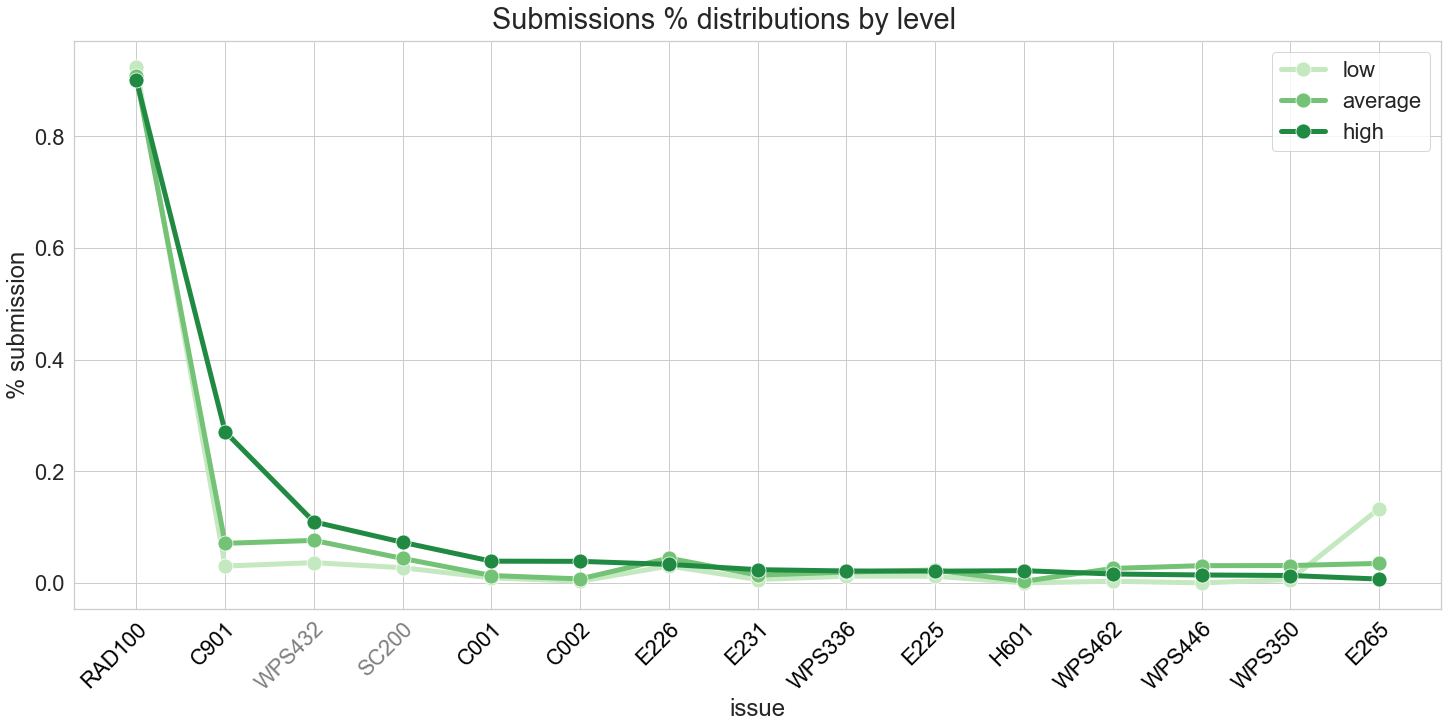

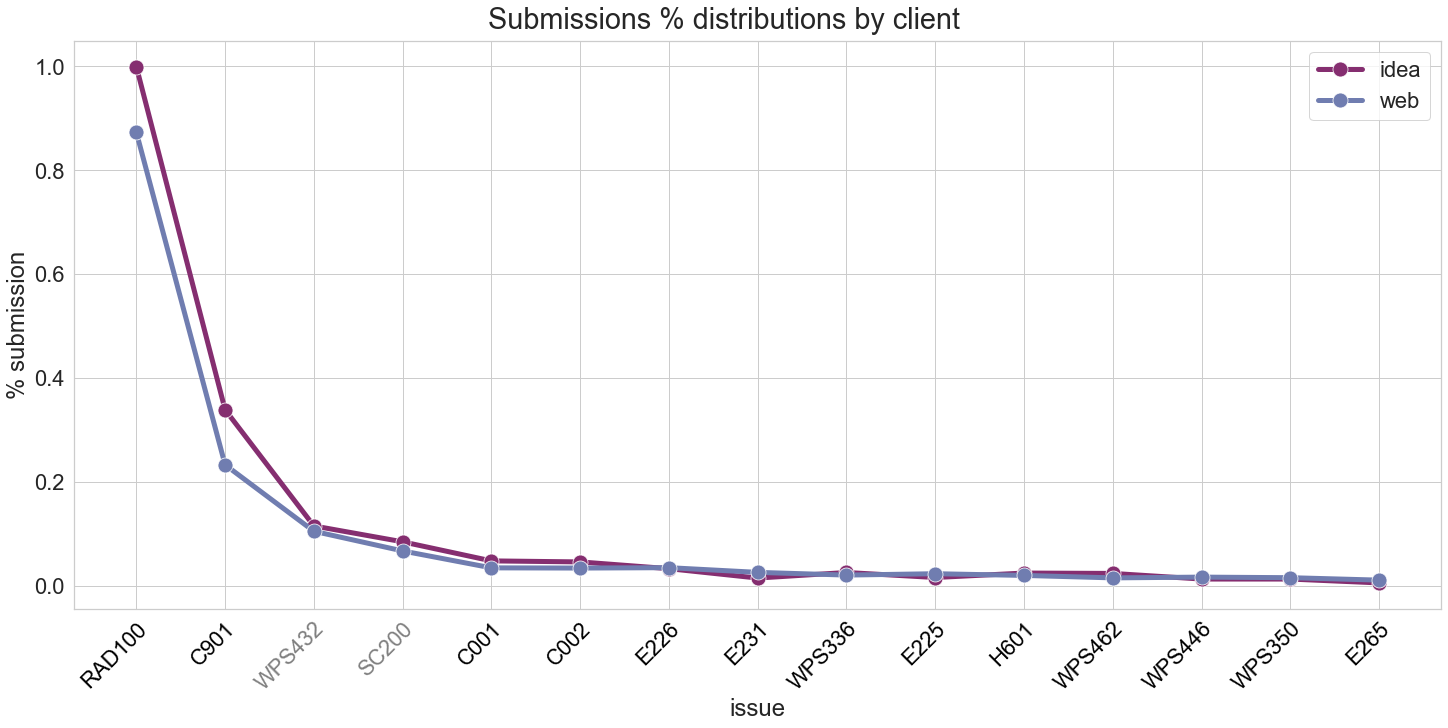

In [27]:
draw_issues(df_raw_issues_stats_unique, df_raw_issues_top, raw_issues_info_classes)

# First attempt stats
First attempt submissions is when **attempt** == 1

In [28]:
df_first_attempt_stats = df_submissions_stats[df_submissions_stats['attempt'] == 1]
df_first_attempt_stats.describe()

id  code_lines_count  code_symbols_count  raw_issues_count  \
count  1.203330e+05     120333.000000       120333.000000     120333.000000   
mean   4.268681e+07          6.513508          126.384940          2.385538   
std    7.710392e+06          4.527973          122.301202          2.879066   
min    2.938330e+07          1.000000            8.000000          0.000000   
25%    3.575652e+07          3.000000           48.000000          1.000000   
50%    4.272384e+07          5.000000           91.000000          1.000000   
75%    4.952578e+07          8.000000          164.000000          3.000000   
max    5.639708e+07         89.000000         3264.000000        105.000000   

       raw_issues_by_code_lines        step_id   sync_counter  code_style  \
count             120333.000000  120333.000000  120333.000000         0.0   
mean                   0.416400    7336.477350       4.804601         NaN   
std                    0.414310    1640.215482       1.023397         NaN   
min                    0.000000    5205.000000       2.000000         NaN   
25%                    0.181818    6382.000000       4.000000         NaN   
50%                    0.333333    6812.000000       5.000000         NaN   
75%                    0.500000    8212.000000       5.000000         NaN   
max                   11.000000   15188.000000      19.000000         NaN   

             user_id         group   attempt  total_attempts  
count  120333.000000  1.203330e+05  120333.0   120333.000000  
mean    14570.554212  1.055683e+05       1.0        1.154106  
std     11866.230563  8.198010e+04       0.0        0.480379  
min         3.000000  2.000000e+00       1.0        1.000000  
25%      4186.000000  5.234900e+04       1.0        1.000000  
50%     12156.000000  1.038630e+05       1.0        1.000000  
75%     21566.000000  1.532290e+05       1.0        1.000000  
max     82097.000000  1.722213e+06       1.0        5.000000

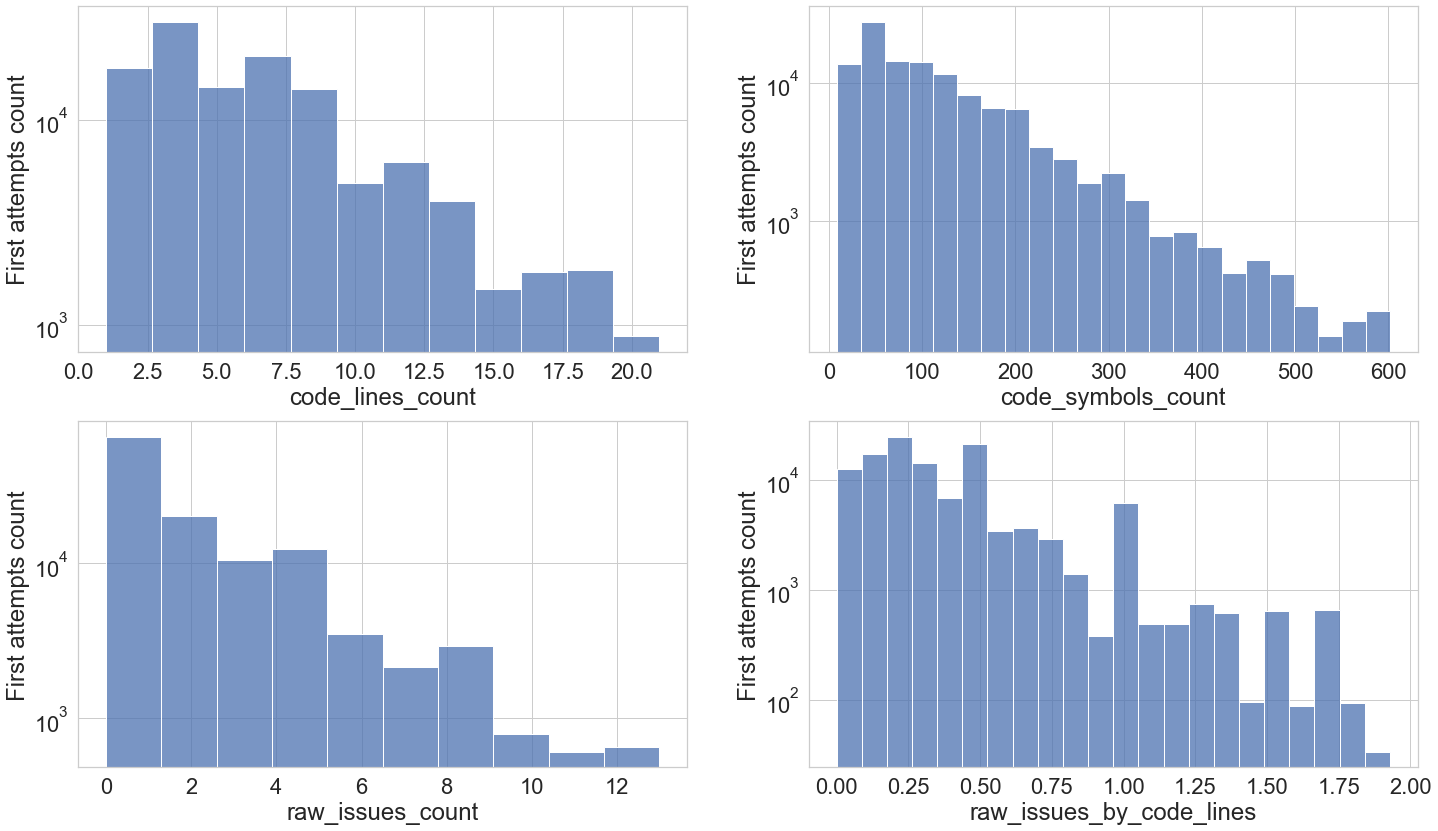

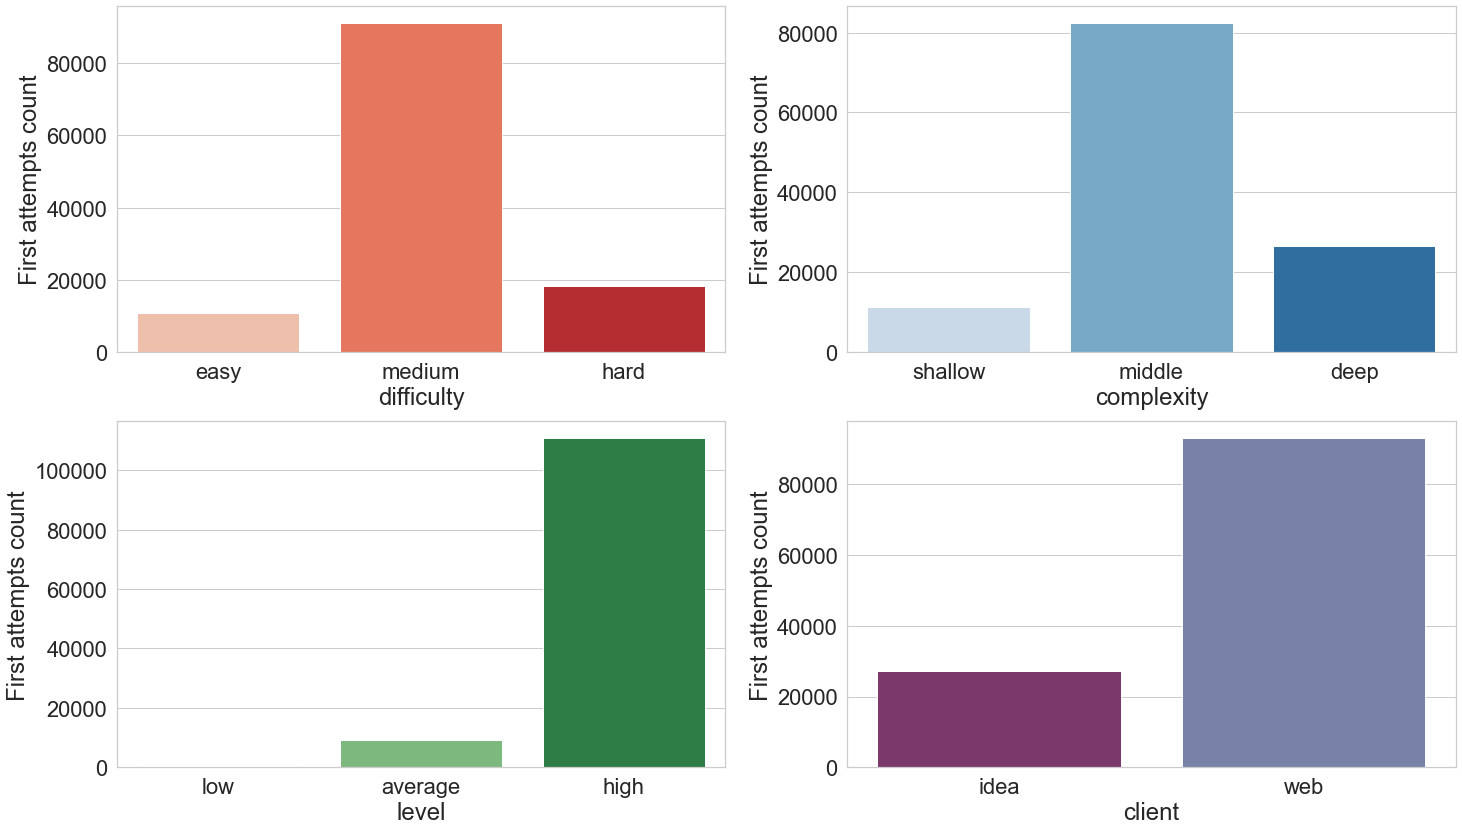

In [29]:
draw_hist_plots(df_first_attempt_stats, ['code_lines_count', 'code_symbols_count', 
                                       'raw_issues_count', 'raw_issues_by_code_lines'], 
                log_scale=(False, True), y_label='First attempts count')

draw_count_plots(df_first_attempt_stats, ['difficulty', 'complexity', 'level', 'client'], y_label='First attempts count')

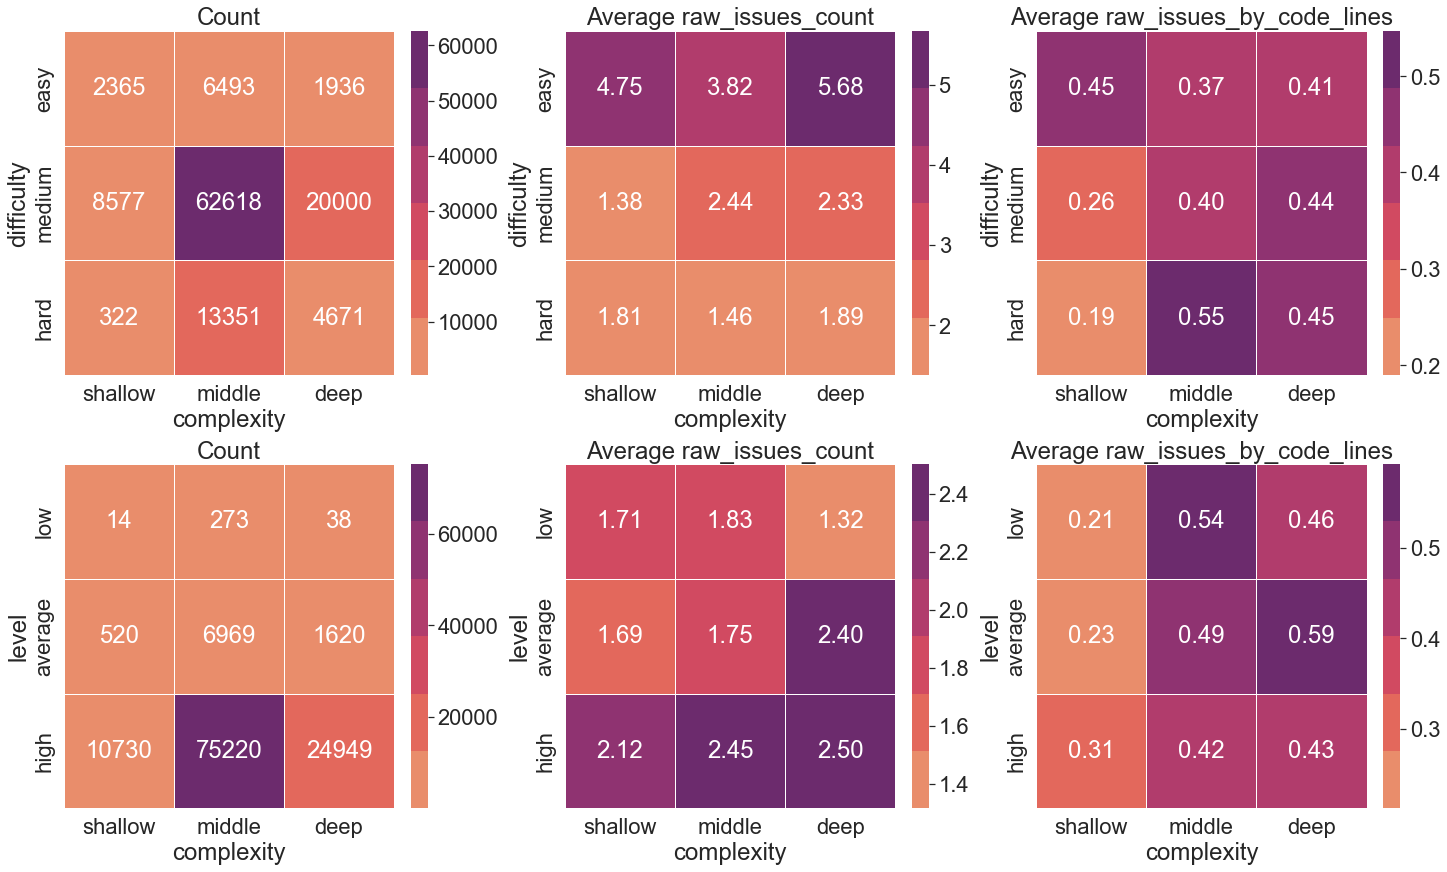

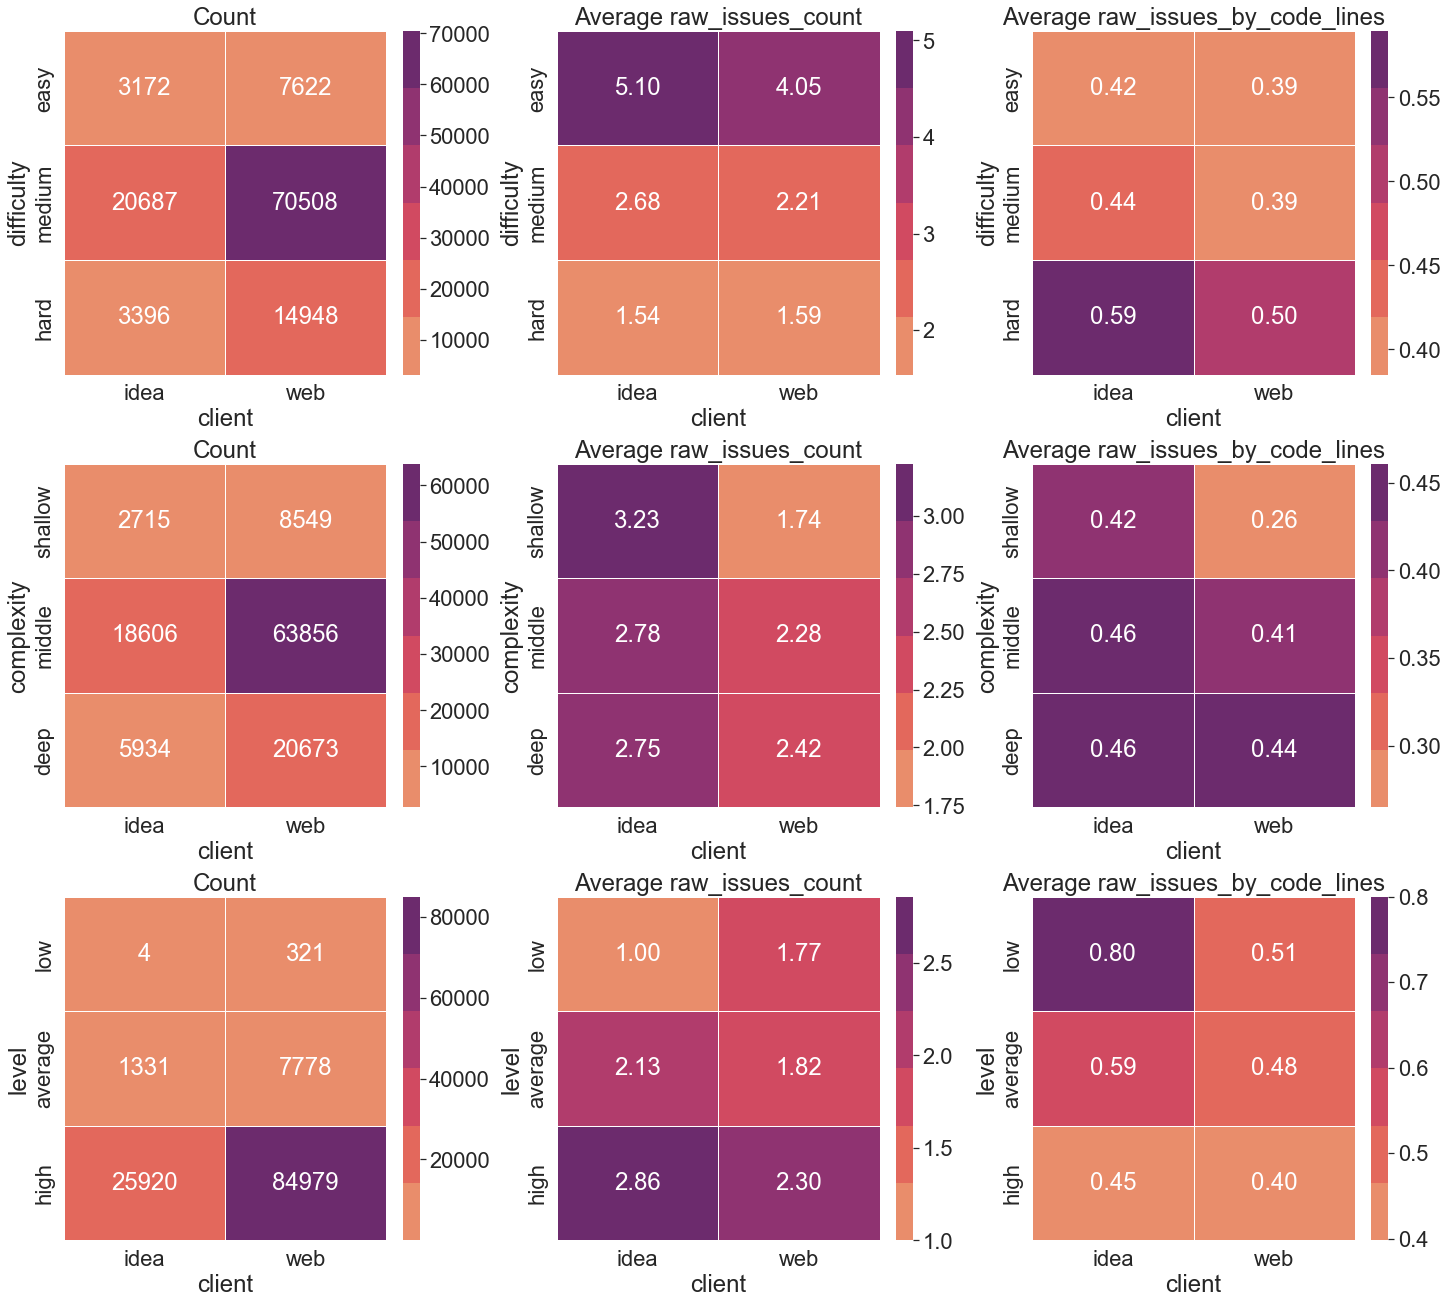

In [30]:
draw_heatmap_compare(df_first_attempt_stats, 
                     [('difficulty', 'complexity'), ('level', 'complexity')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])
draw_heatmap_compare(df_first_attempt_stats,
                     [('difficulty', 'client'), ('complexity', 'client'), ('level', 'client')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])

### First attempt issues statistics

In [31]:
df_first_attempt_raw_issues_stats = merge_dfs(df_first_attempt_stats, df_raw_issues_stats, left_on='id', right_on='id')
df_first_attempt_raw_issues_stats_unique = merge_dfs(df_first_attempt_stats, df_raw_issues_stats_unique, left_on='id', right_on='id')


### Percent of submissions with each issue class (first attempt)

### Raw issues

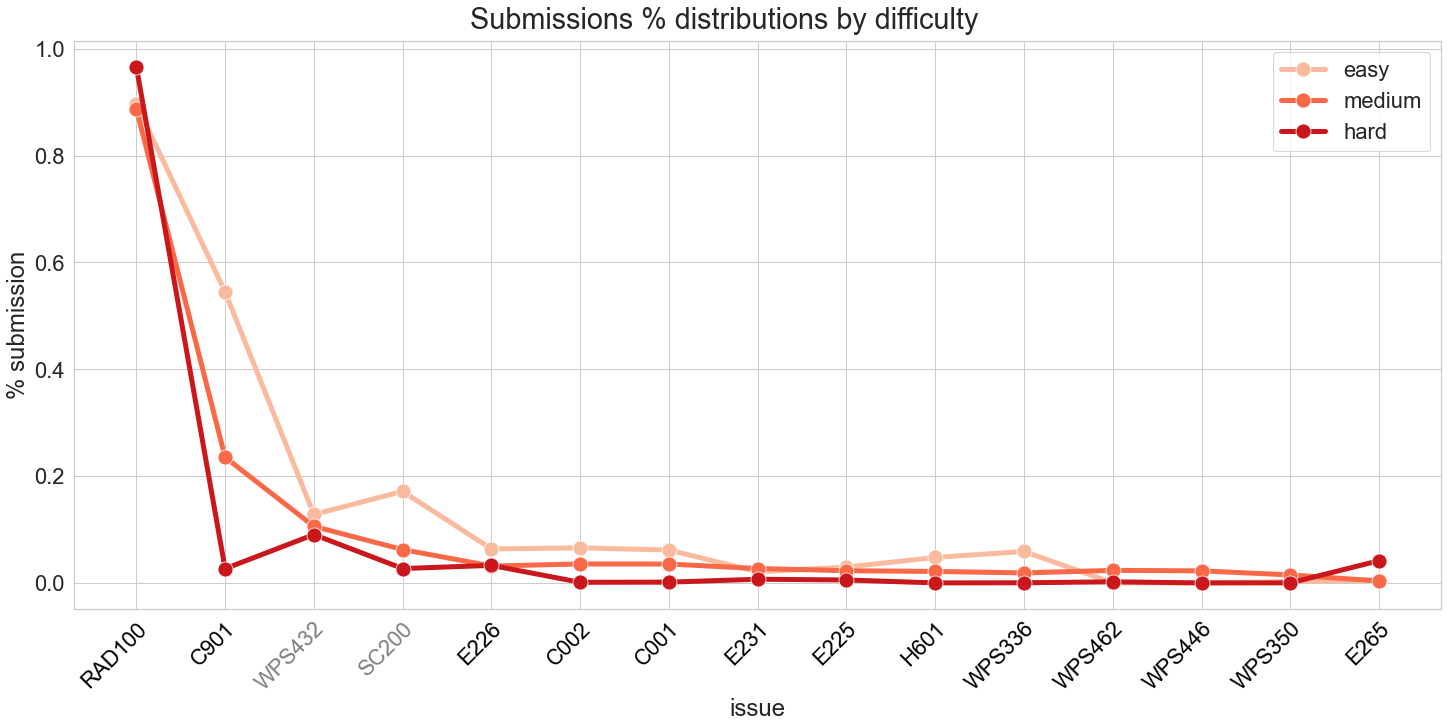

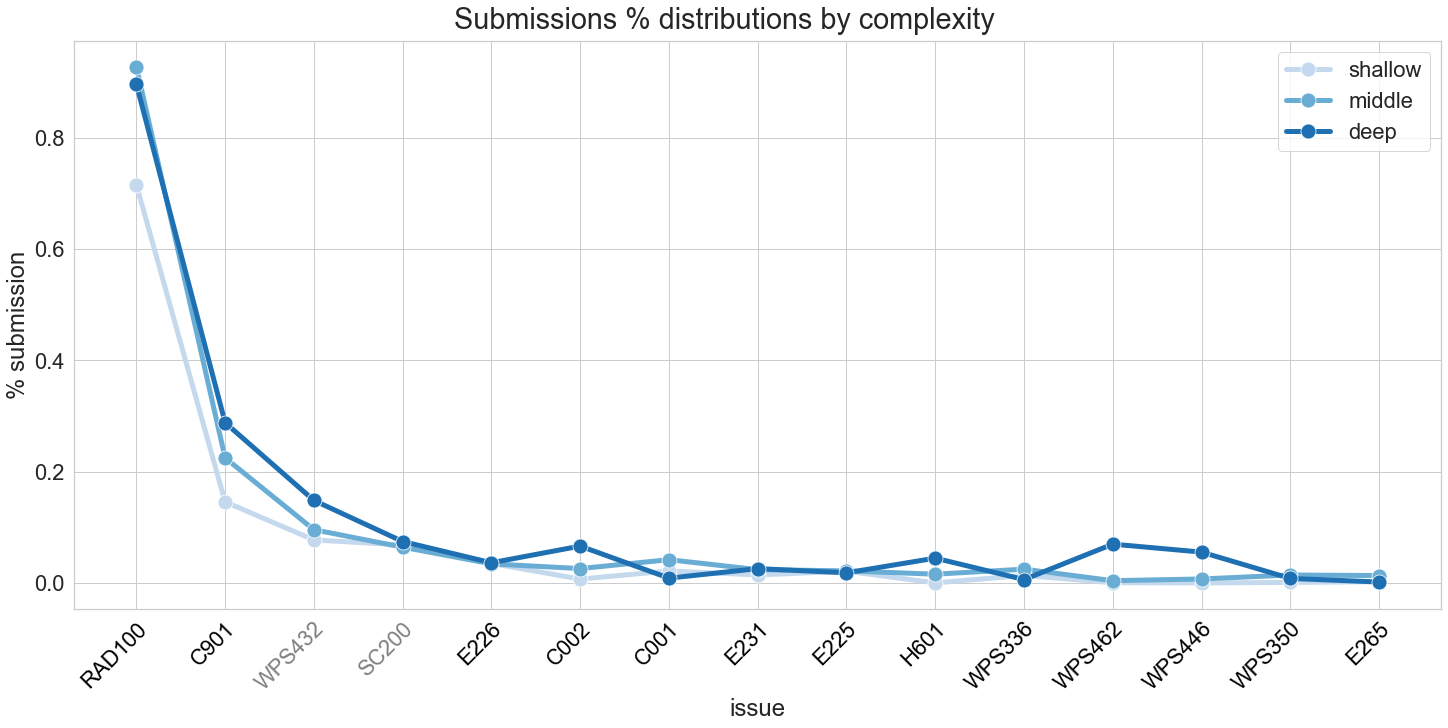

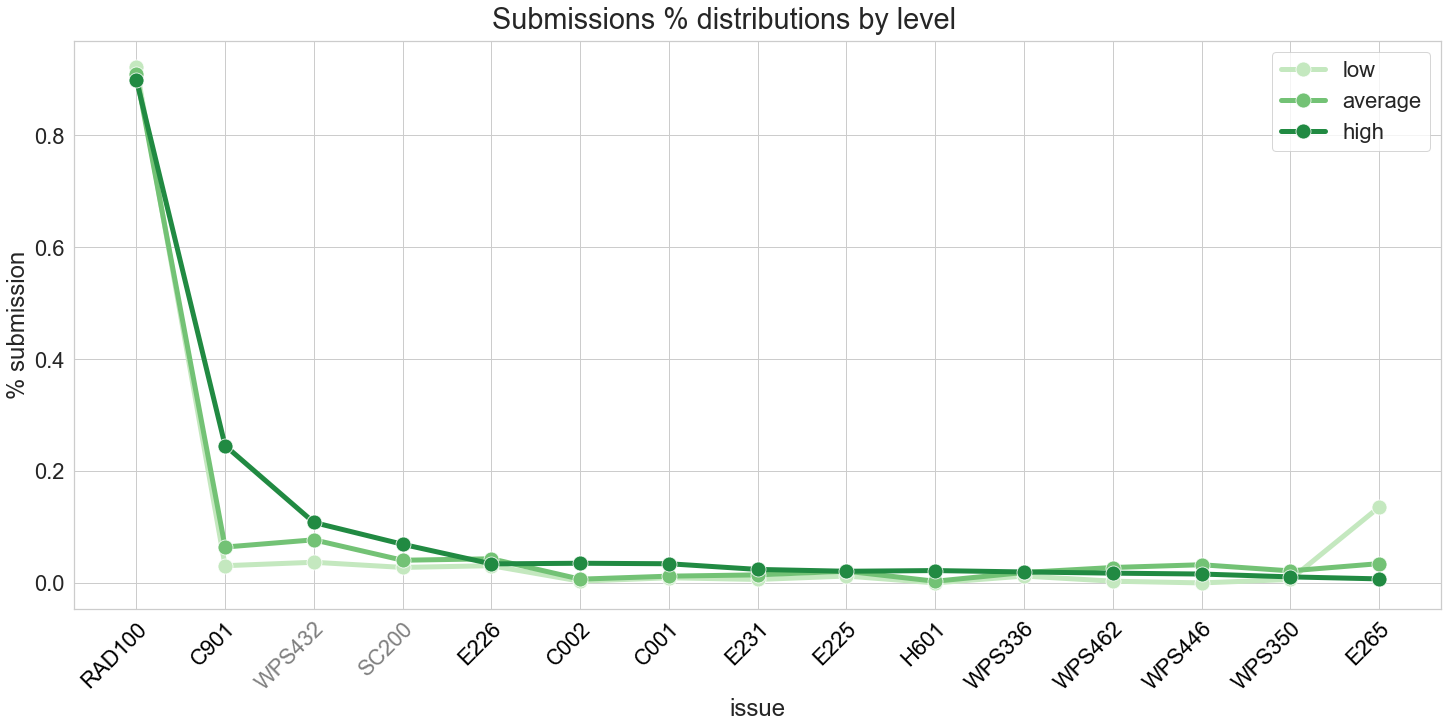

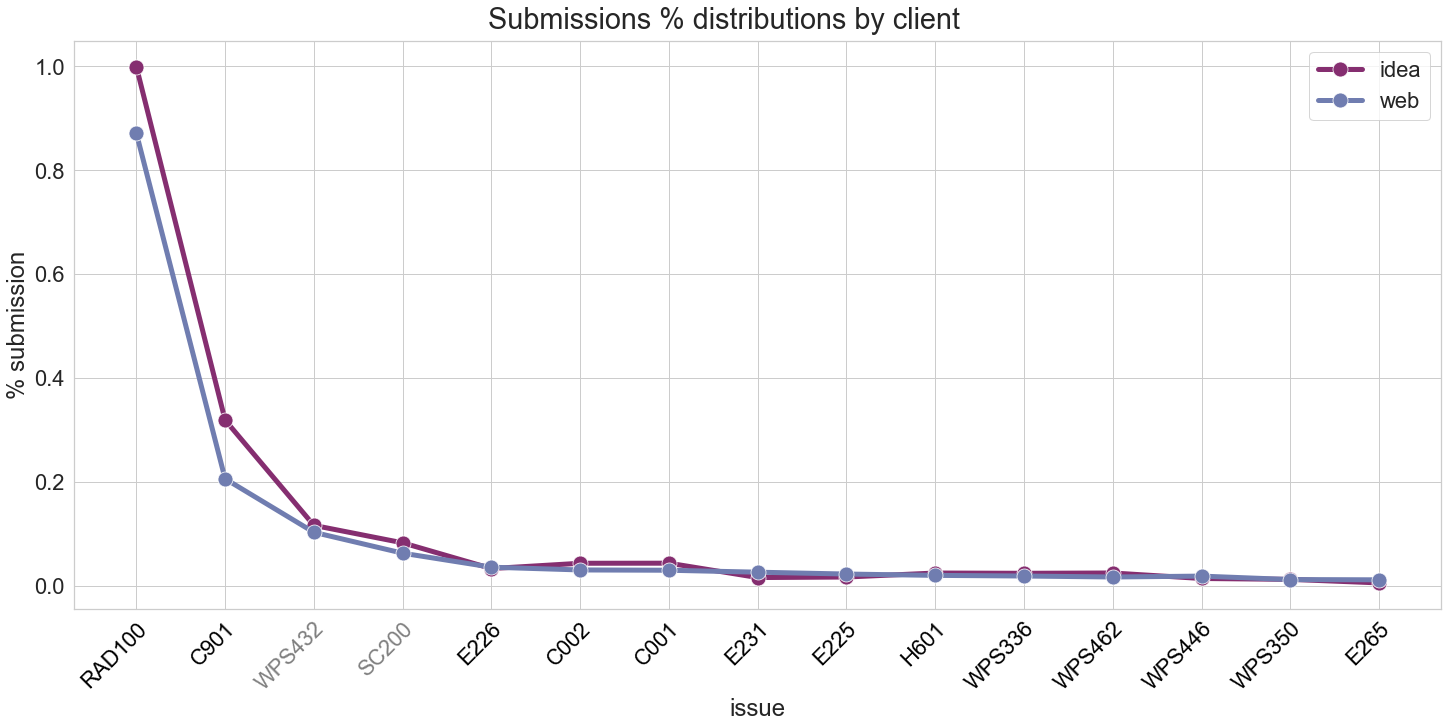

In [32]:
draw_issues(df_first_attempt_raw_issues_stats_unique, df_raw_issues_top, raw_issues_info_classes)

# Last attempt stats

Last attempt submissions is when **attempt** == **total_attemps** - final result of all attemps

In [33]:
df_last_attempt_stats = df_submissions_stats[df_submissions_stats['attempt'] == df_submissions_stats['total_attempts']]
df_last_attempt_stats.describe()

id  code_lines_count  code_symbols_count  raw_issues_count  \
count  1.203330e+05     120333.000000       120333.000000     120333.000000   
mean   4.269663e+07          6.467727          125.543475          2.215992   
std    7.710513e+06          4.481627          121.077536          2.681963   
min    2.938330e+07          1.000000            8.000000          0.000000   
25%    3.577425e+07          3.000000           48.000000          1.000000   
50%    4.273895e+07          5.000000           90.000000          1.000000   
75%    4.954060e+07          8.000000          163.000000          3.000000   
max    5.639711e+07         89.000000         3264.000000        105.000000   

       raw_issues_by_code_lines        step_id   sync_counter  code_style  \
count             120333.000000  120333.000000  120333.000000         0.0   
mean                   0.391839    7336.477350       4.805332         NaN   
std                    0.381988    1640.215482       1.022594         NaN   
min                    0.000000    5205.000000       2.000000         NaN   
25%                    0.166667    6382.000000       4.000000         NaN   
50%                    0.285714    6812.000000       5.000000         NaN   
75%                    0.500000    8212.000000       5.000000         NaN   
max                   11.000000   15188.000000      19.000000         NaN   

             user_id         group        attempt  total_attempts  
count  120333.000000  1.203330e+05  120333.000000   120333.000000  
mean    14570.554212  1.055683e+05       1.154106        1.154106  
std     11866.230563  8.198010e+04       0.480379        0.480379  
min         3.000000  2.000000e+00       1.000000        1.000000  
25%      4186.000000  5.234900e+04       1.000000        1.000000  
50%     12156.000000  1.038630e+05       1.000000        1.000000  
75%     21566.000000  1.532290e+05       1.000000        1.000000  
max     82097.000000  1.722213e+06       5.000000        5.000000

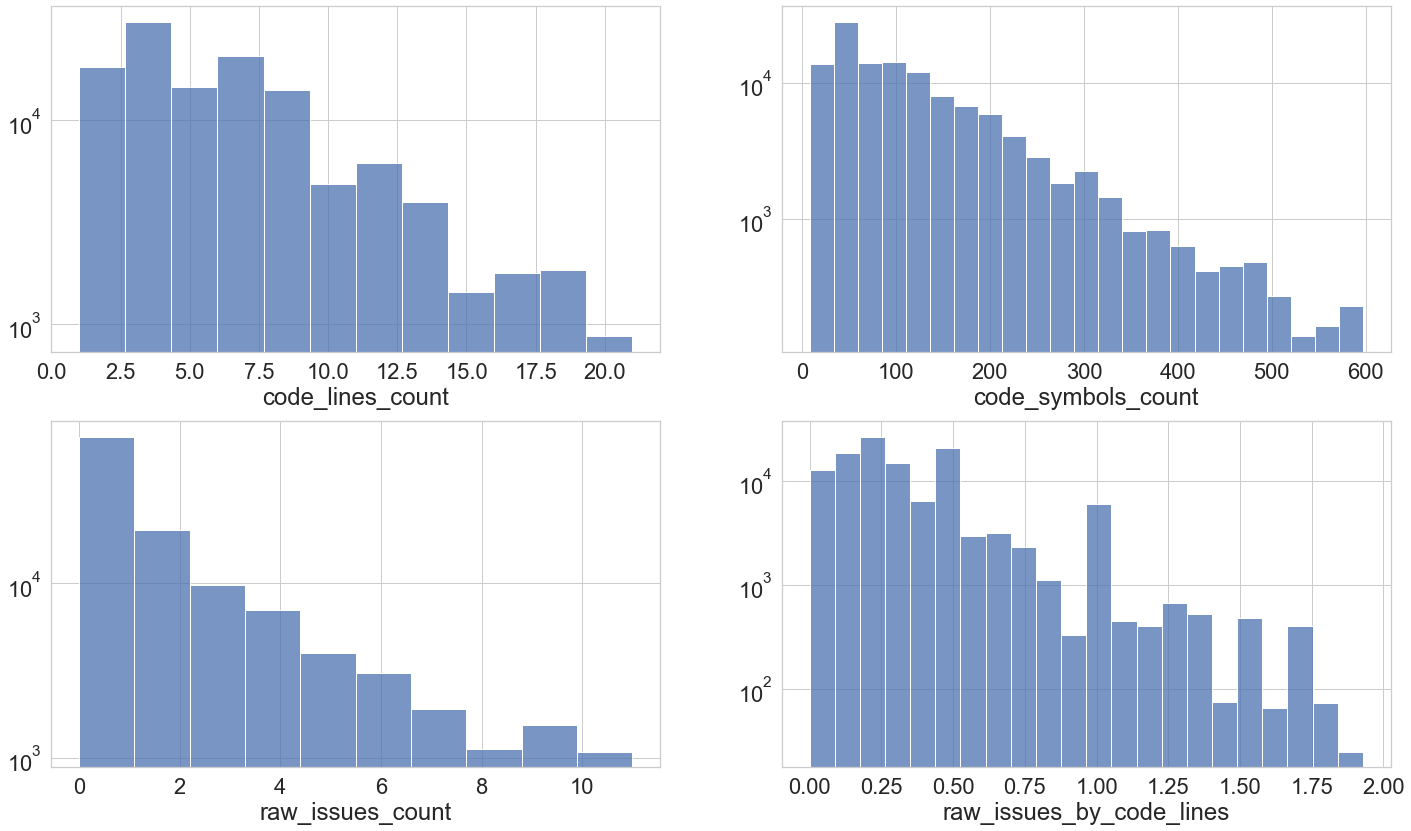

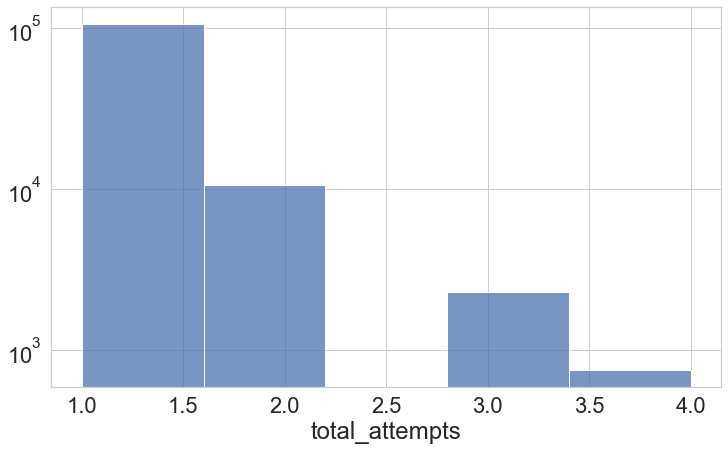

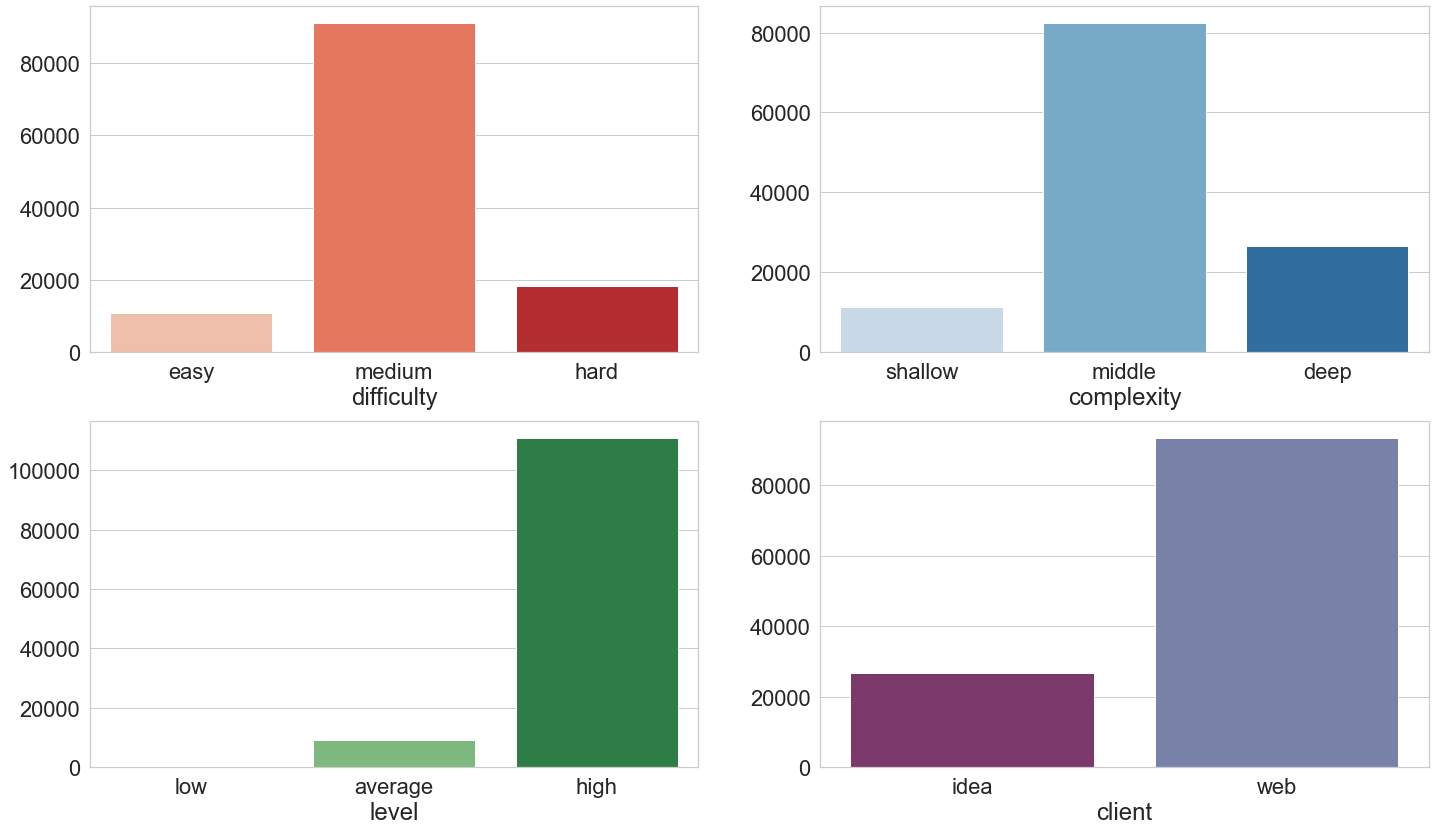

In [34]:
draw_hist_plots(df_last_attempt_stats, ['code_lines_count', 'code_symbols_count', 
                                       'raw_issues_count', 'raw_issues_by_code_lines'], 
                log_scale=(False, True))
draw_hist_plots(df_last_attempt_stats, ['total_attempts'], log_scale=(False, True), q=1, bins=5)
draw_count_plots(df_last_attempt_stats, ['difficulty', 'complexity', 'level', 'client'])

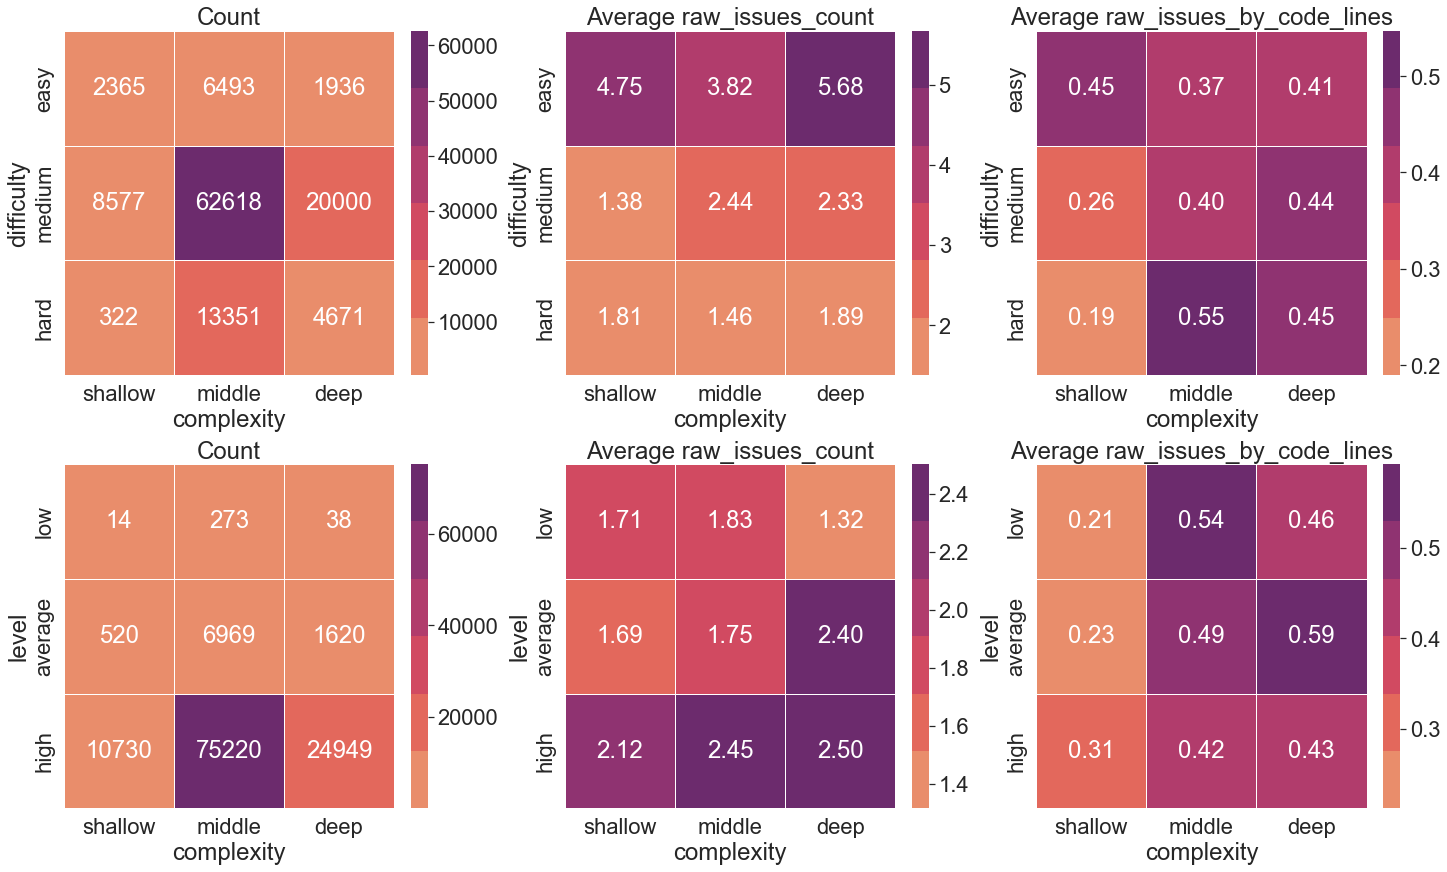

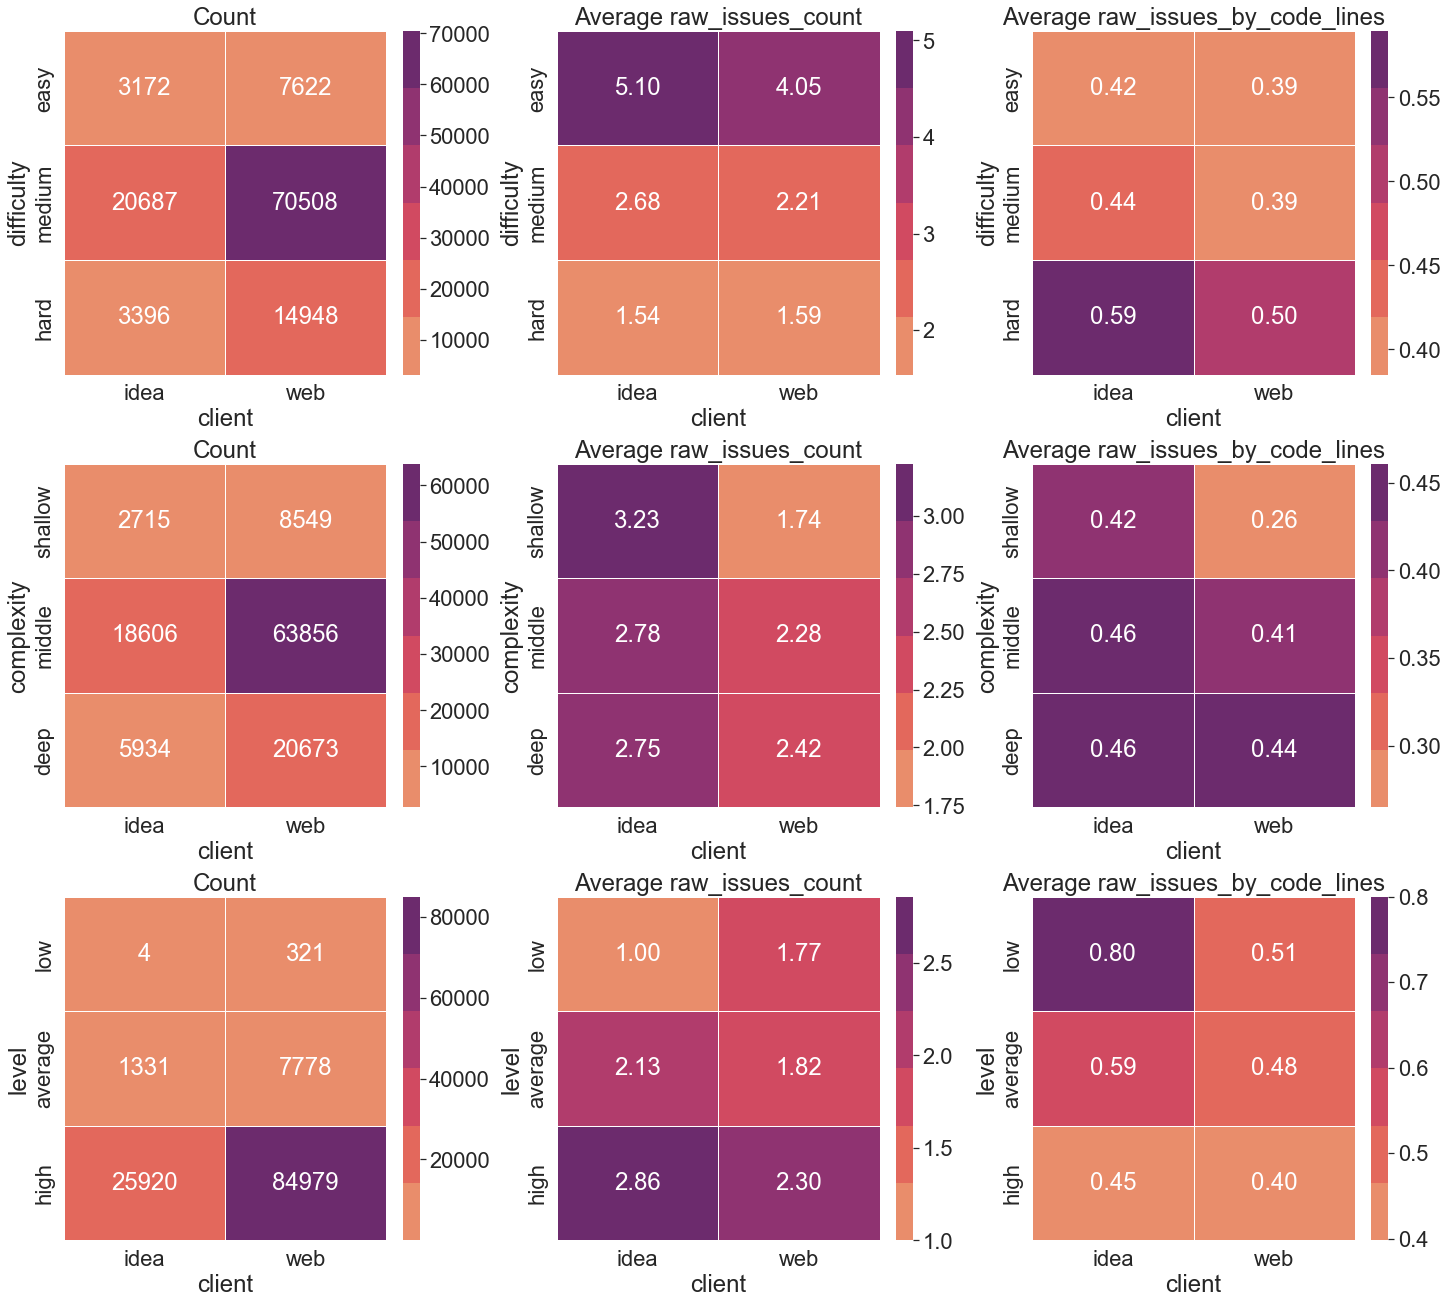

In [35]:
draw_heatmap_compare(df_first_attempt_stats, 
                     [('difficulty', 'complexity'), ('level', 'complexity')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])
draw_heatmap_compare(df_first_attempt_stats,
                     [('difficulty', 'client'), ('complexity', 'client'), ('level', 'client')],
                     ['id', 'raw_issues_count', 'raw_issues_by_code_lines'])

### Last attempt issues statistics

In [36]:
df_last_attempt_raw_issues_stats = merge_dfs(df_last_attempt_stats, df_raw_issues_stats, left_on='id', right_on='id')
df_last_attempt_raw_issues_stats_unique = merge_dfs(df_last_attempt_stats, df_raw_issues_stats_unique, left_on='id', right_on='id')

### Percent of submissions with each issue class (last attempt)

### Raw issues

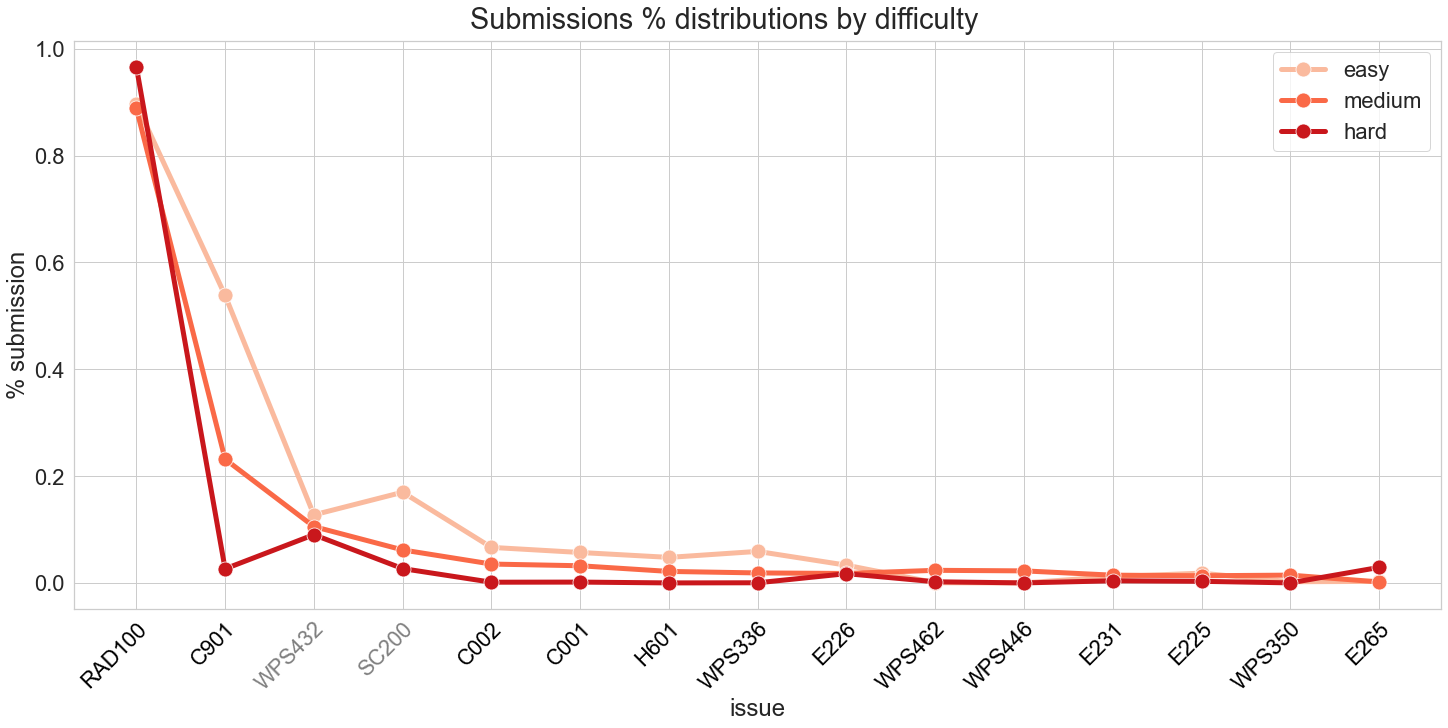

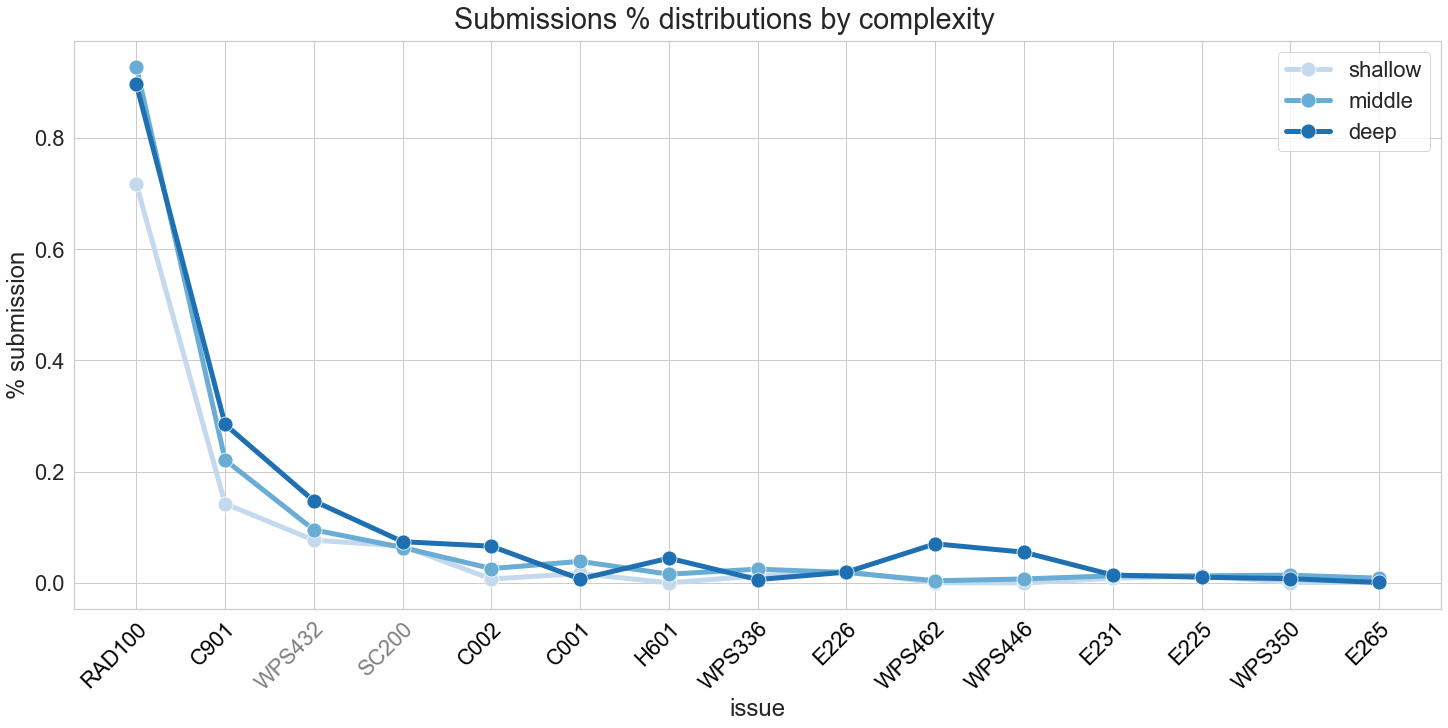

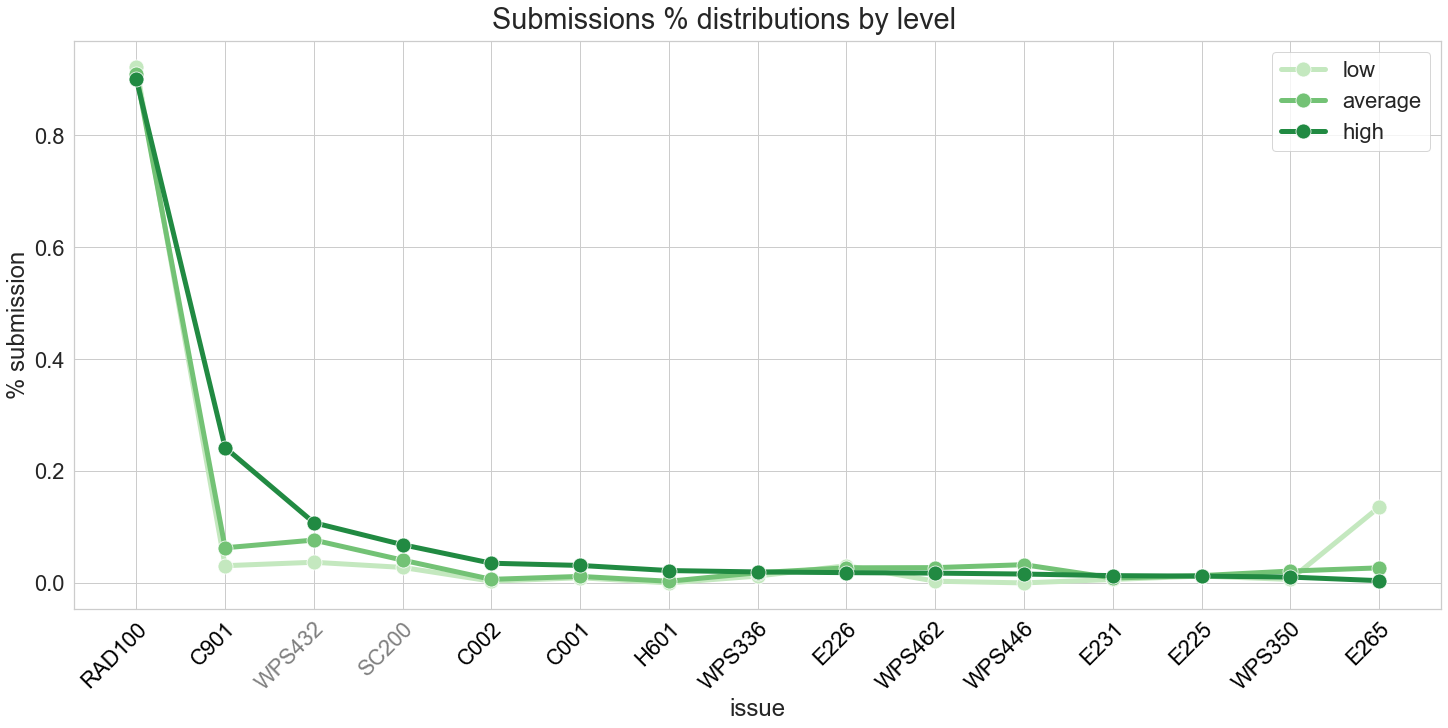

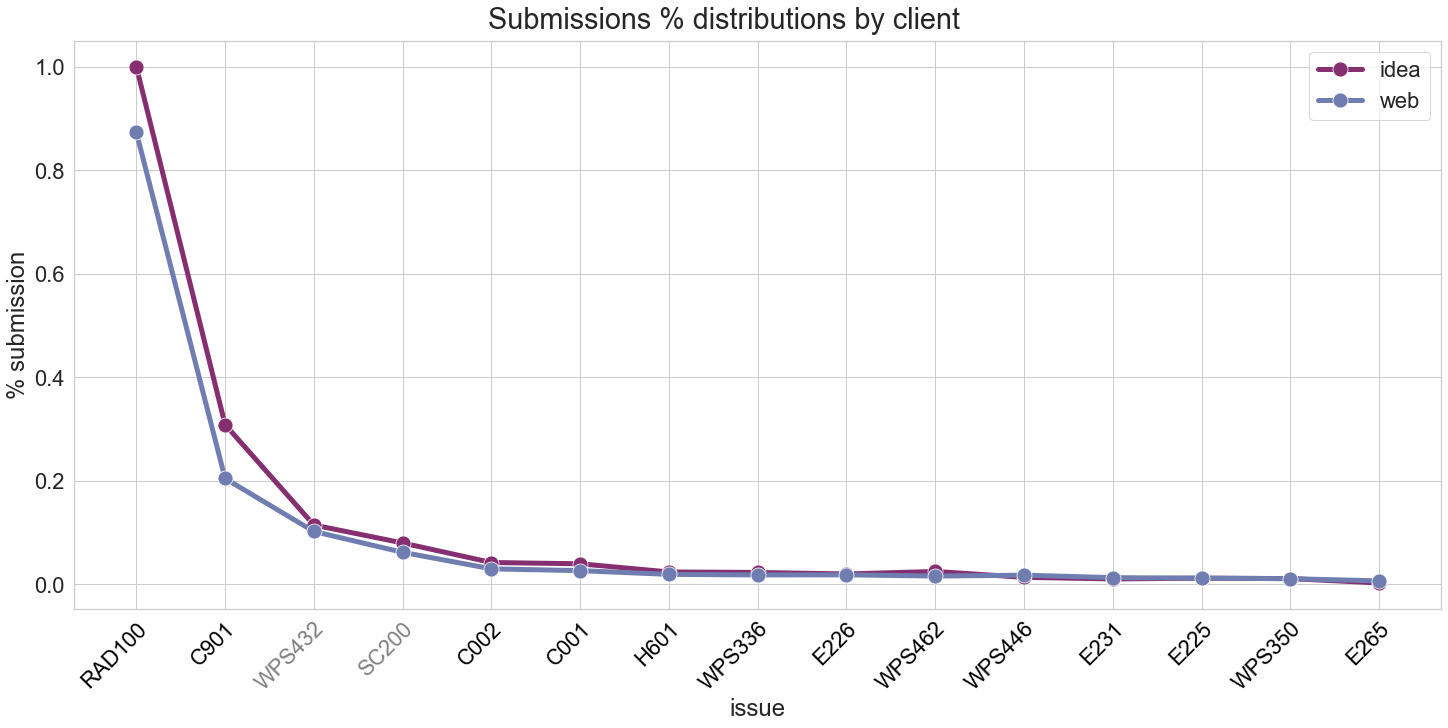

In [37]:
draw_issues(df_last_attempt_raw_issues_stats_unique, df_raw_issues_top, raw_issues_info_classes)

## Client statistics
Client is the interface where student implement step's task. Following section contains client popularity and change throught attemps analysis.

In [47]:
df_client_stats = pd.read_csv(client_stats_file_path)

In [48]:
df_last_attempt_stats = merge_dfs(df_last_attempt_stats, df_client_stats, left_on='group', right_on='group')

In [49]:
df_last_attempt_client_stats = get_client_stats(df_last_attempt_stats)
df_last_attempt_client_stats

client_series  total_attempts  count
34                                   ["web"]               1  81901
19                                  ["idea"]               1  24437
33                            ["web", "web"]               2   8395
9                           ["idea", "idea"]               2   1852
32                     ["web", "web", "web"]               3   1848
31              ["web", "web", "web", "web"]               4    611
18                           ["idea", "web"]               2    366
5                   ["idea", "idea", "idea"]               3    335
30       ["web", "web", "web", "web", "web"]               5    214
24                           ["web", "idea"]               2     78
2           ["idea", "idea", "idea", "idea"]               4     73
17                    ["idea", "web", "web"]               3     66
16             ["idea", "web", "web", "web"]               4     26
8                    ["idea", "idea", "web"]               3     25
0   ["idea", "idea", "idea", "idea", "idea"]               5     19
12                   ["idea", "web", "idea"]               3     15
26                    ["web", "web", "idea"]               3     14
28             ["web", "web", "web", "idea"]               4      7
10           ["idea", "web", "idea", "idea"]               4      7
4            ["idea", "idea", "idea", "web"]               4      7
7             ["idea", "idea", "web", "web"]               4      6
15      ["idea", "web", "web", "web", "web"]               5      5
6            ["idea", "idea", "web", "idea"]               4      4
14            ["idea", "web", "web", "idea"]               4      4
11            ["idea", "web", "idea", "web"]               4      3
3     ["idea", "idea", "idea", "web", "web"]               5      3
29      ["web", "web", "web", "web", "idea"]               5      3
21                   ["web", "idea", "idea"]               3      2
25            ["web", "web", "idea", "idea"]               4      1
27     ["web", "web", "web", "idea", "idea"]               5      1
1    ["idea", "idea", "idea", "idea", "web"]               5      1
13     ["idea", "web", "web", "idea", "web"]               5      1
22             ["web", "idea", "web", "web"]               4      1
20            ["web", "idea", "idea", "web"]               4      1
23                    ["web", "idea", "web"]               3      1

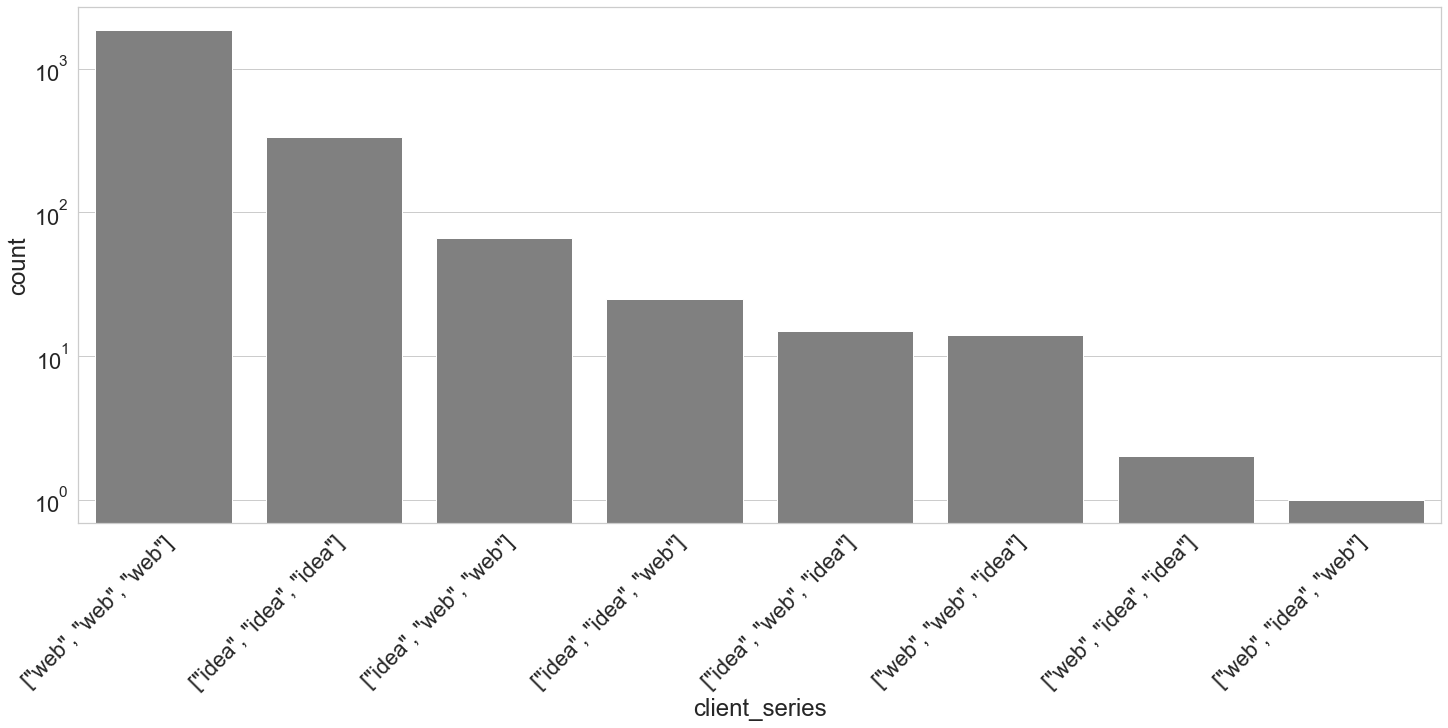

In [50]:
draw_stat_plot(df_last_attempt_stats[df_last_attempt_stats['total_attempts'] == 3], 'client_series')

In [51]:
df_client_dinamic = get_submissions_series_client_dynamic(
    df_last_attempt_client_stats[df_last_attempt_client_stats['total_attempts'] == 3])
df_client_dinamic

attempt  from    to  count
0         1  idea  idea    360
1         1  idea   web     81
2         1   web  idea      3
3         1   web   web   1862
4         2  idea  idea    337
5         2  idea   web     26
6         2   web  idea     29
7         2   web   web   1914
8         3  idea  idea      0
9         3  idea   web      0
10        3   web  idea      0
11        3   web   web      0

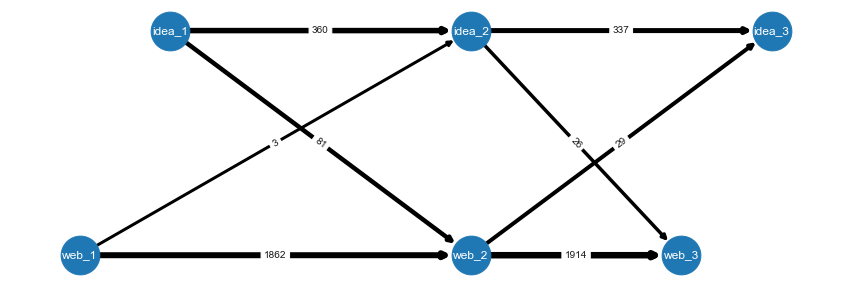

In [52]:
draw_client_dynamic_graph(df_client_dinamic)

# Submission series (groups)
To pass the step user can make several attemps. The ordered sequence of attemps in **submission series**

In [53]:
def draw_feature_dynamic(feature: str, max_attempts: int = 3, exact_attempts: bool = True, is_mean=True):
    for attr in ['difficulty', 'complexity', 'level', 'client']:
        df_dynamic = get_submissions_series_dynamic_by_feature(df_submissions_stats, feature, attr)
#         uncomment to save stats to csv
#         df_dynamic.to_csv(f'{feature}_dynamic_{attr}.csv', index=False)
        draw_compare(df_dynamic, 'attempt', attr, y_label=f'mean\n{feature}', title=f'{feature} dynamic by attemps')

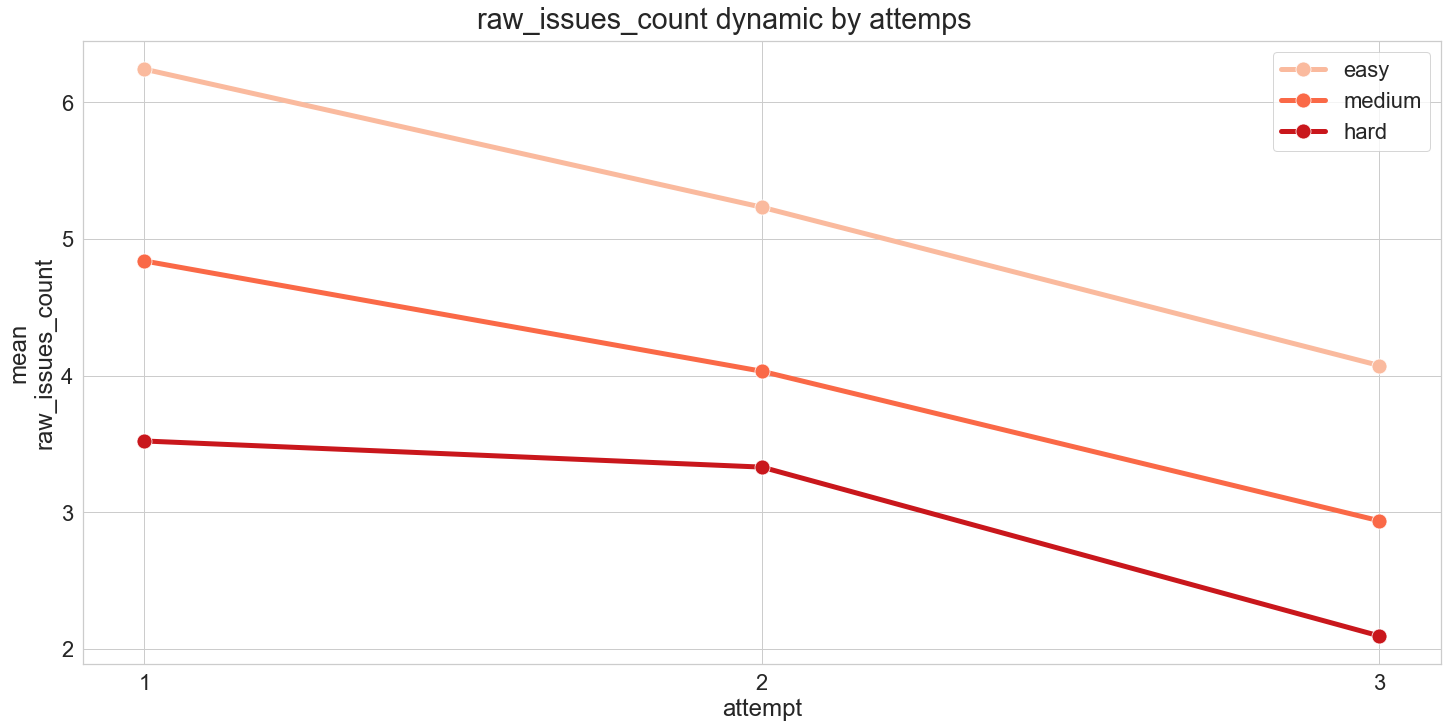

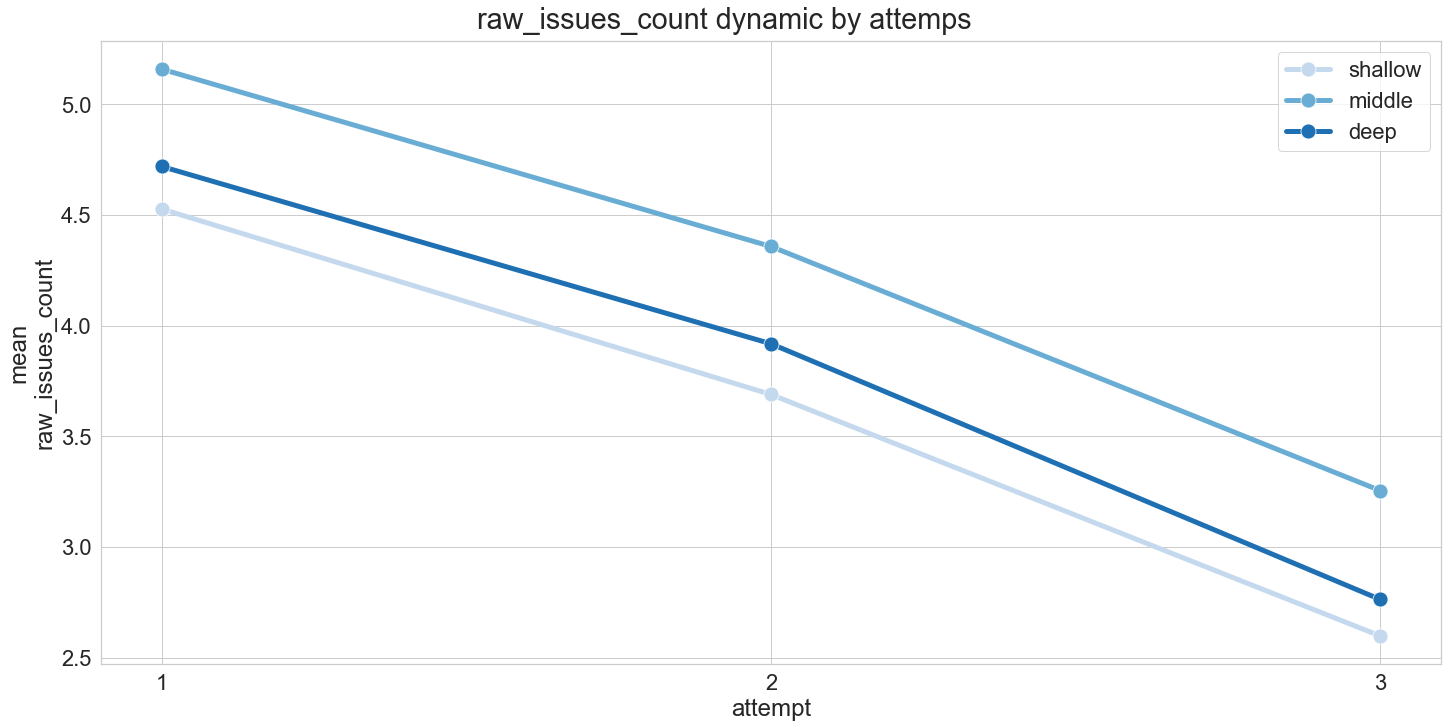

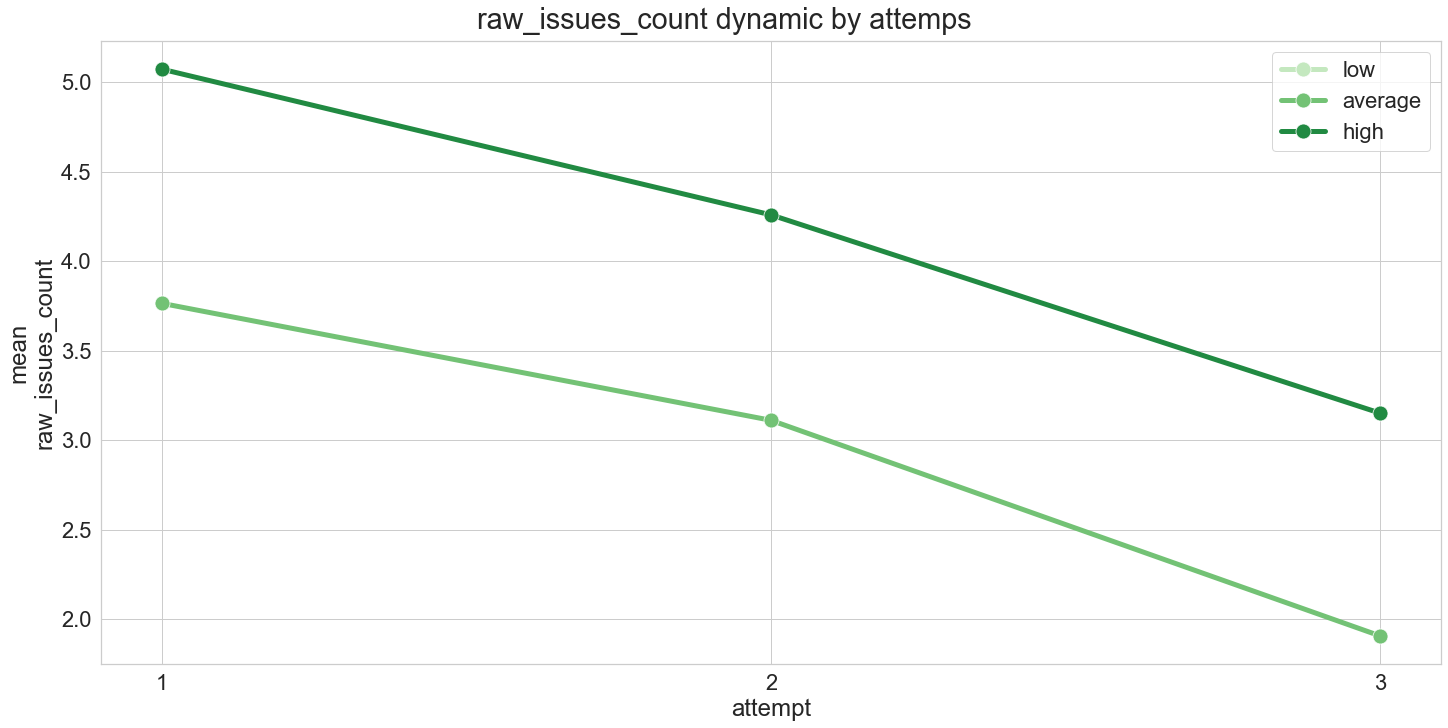

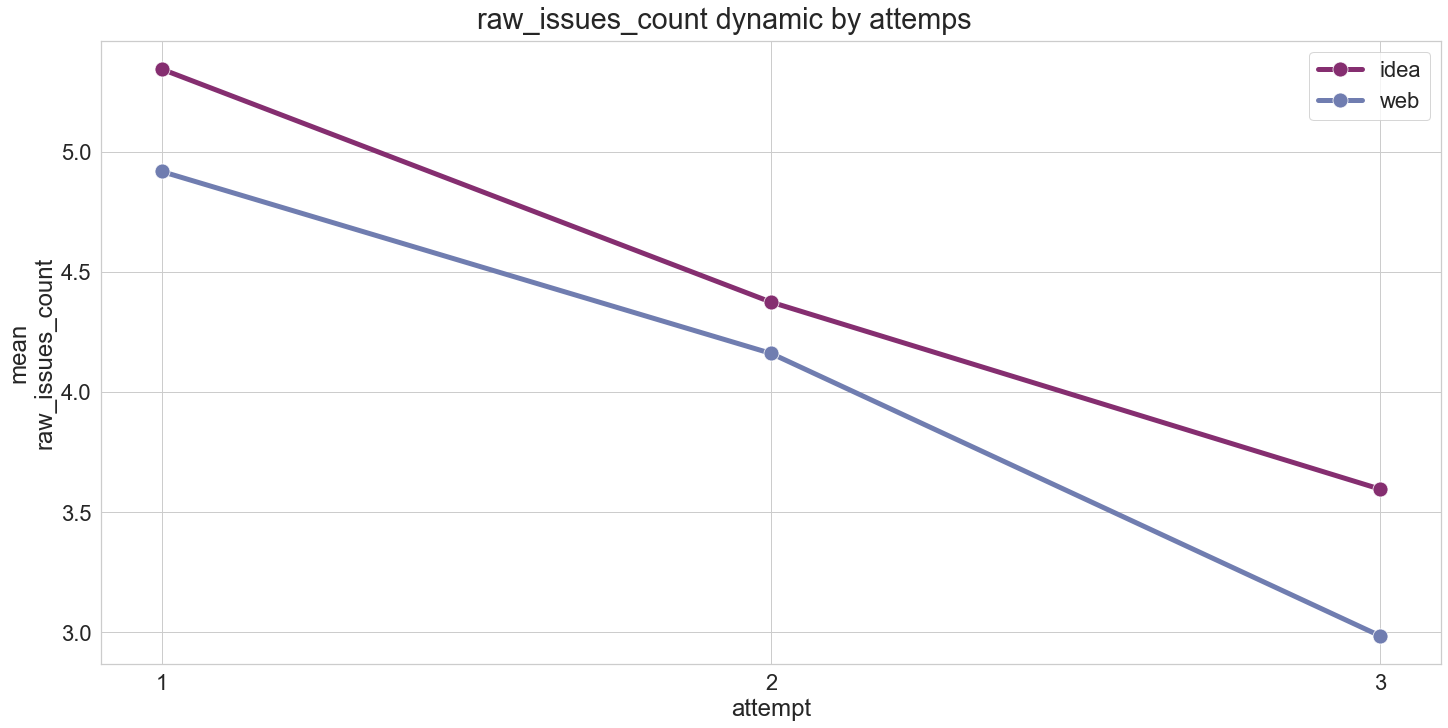

In [54]:
draw_feature_dynamic('raw_issues_count')

### Submissions series dynamic
Plots show how average soution parameters change throught attemps 

### Dynamin for all sobmission series with total_attemps = 3

In [55]:
def draw_issues_dynamic(df: pd.DataFrame, df_issues: pd.DataFrame, max_attempts: int = 3,
                                          exact_attempts: bool = True, by_type=False, is_mean=True):
    df_issues_dynamic = get_submissions_series_issues_dynamic(df, df_issues, 
                                                           max_attempts, exact_attempts, by_type, is_mean)
#     uncomment to save data to csv
#     df_issues_dynamic.to_csv(f'issues_dynamic.csv', index=False)
    issues = df_issues['type' if by_type else 'class'].unique()
    draw_compare(df_issues_dynamic, 'attempt', ('issue', issues))

### Raw issues

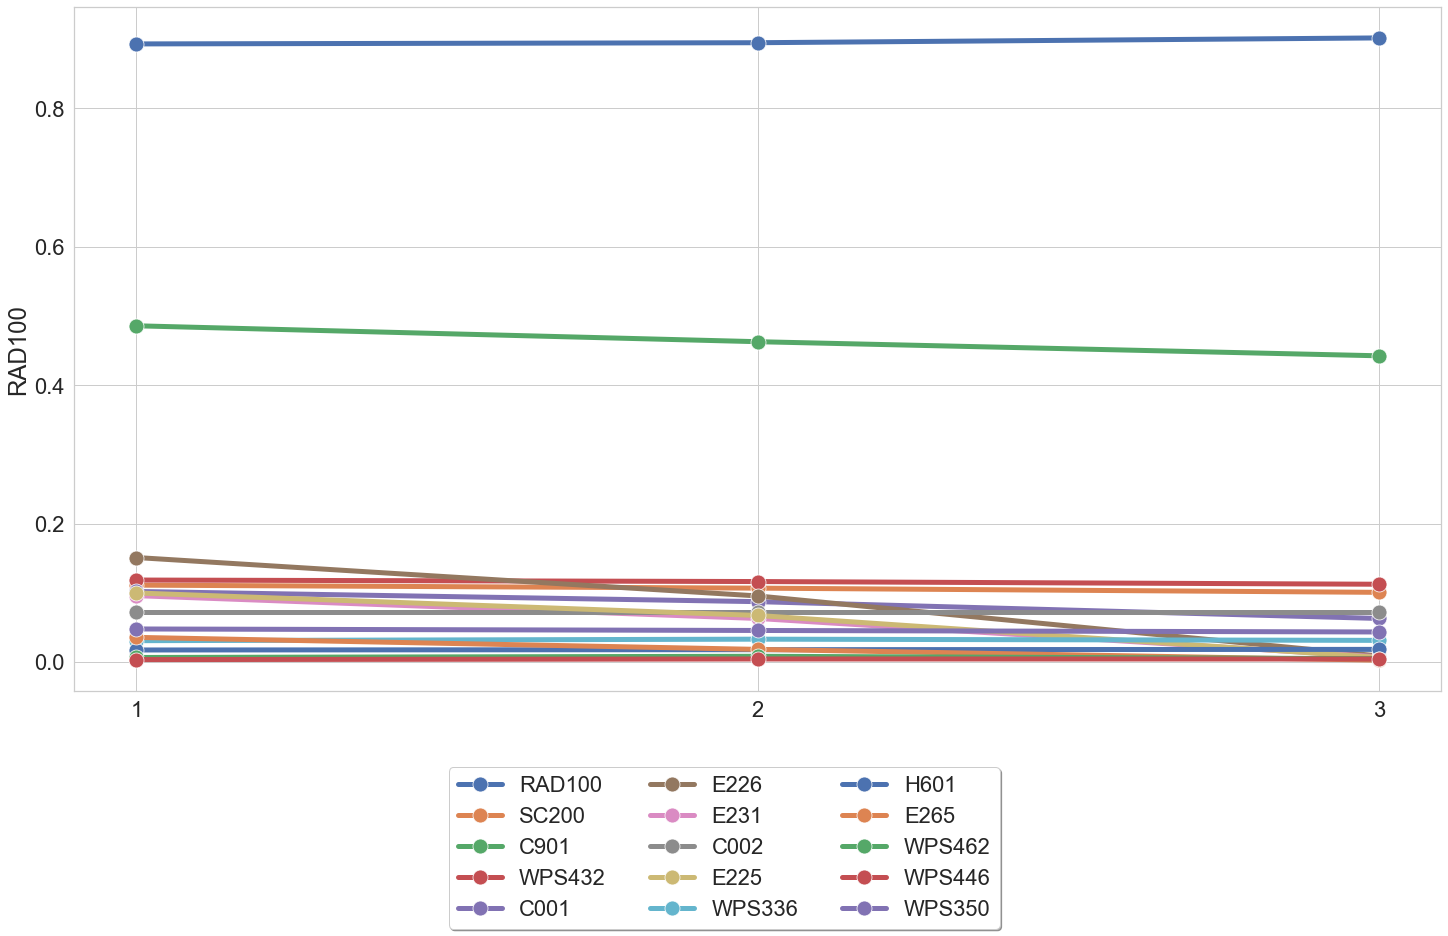

<Figure size 432x288 with 0 Axes>

In [56]:
draw_issues_dynamic(df_raw_issues_stats_unique, df_raw_issues_top)

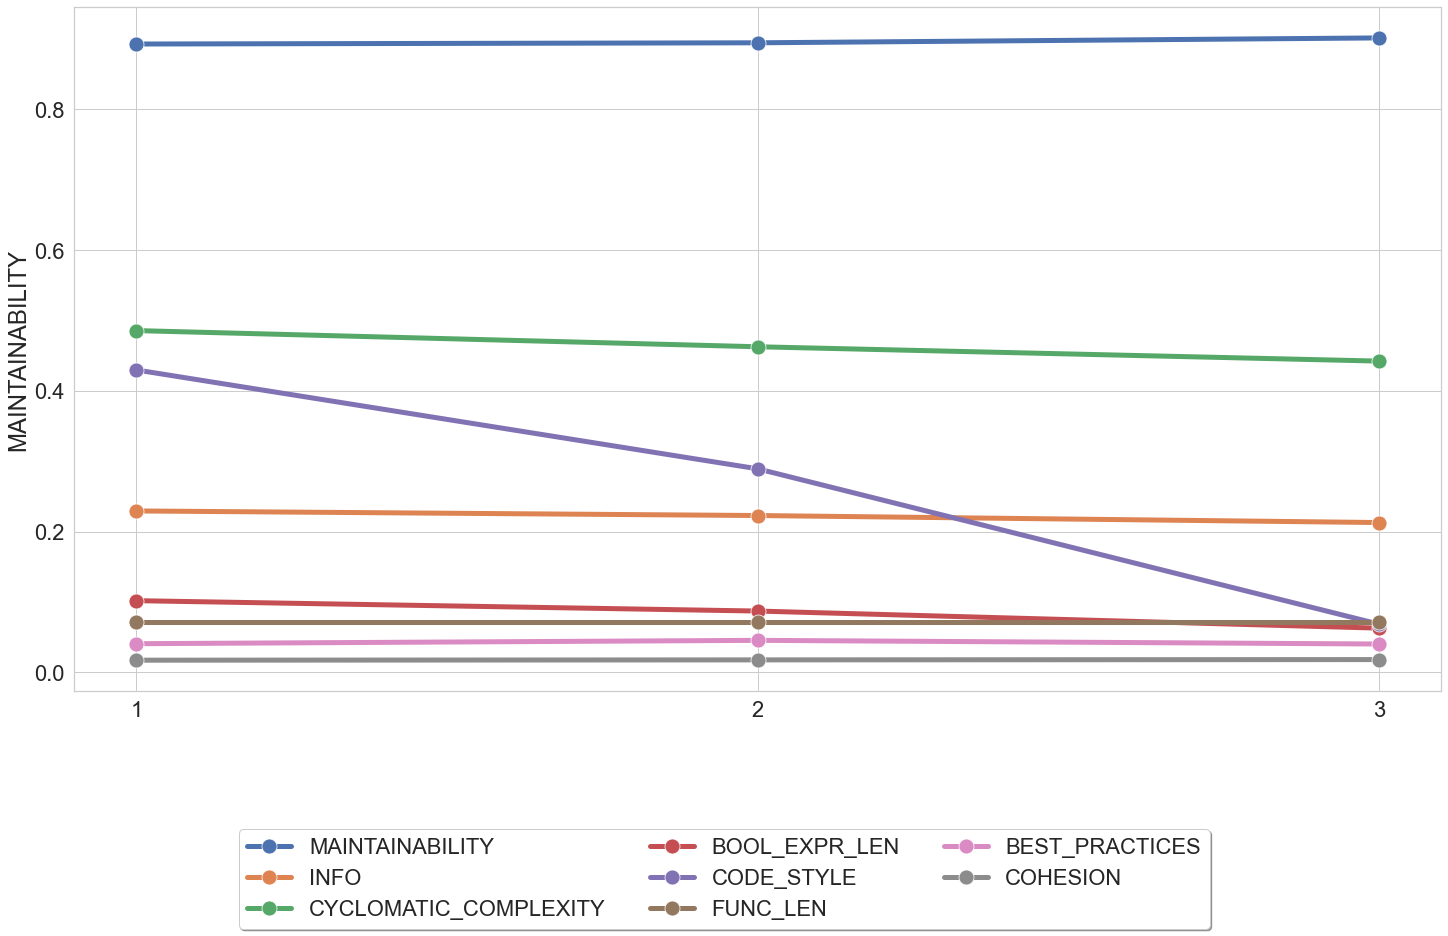

<Figure size 432x288 with 0 Axes>

In [57]:
draw_issues_dynamic(df_raw_issues_stats_unique, df_raw_issues_top, by_type=True)